
# Test of orbital transfer

In [ ]:
import numpy as np
from scipy.constants import c

# Constants
G = 6.67430e-11  # Gravitational constant (m^3/kg/s^2)
M_sun = 4e6 * 1.989e30  # Mass of the Galactic centre (kg)
mu, sigma = 0.05488*c, 0.02355*c # mean and standard deviation

def circular_orbit_velocity(r, M=M_sun):
    """Compute the circular orbital velocity at radius r."""
    return np.sqrt(G * M / r)

def specific_energy(r, v, M=M_sun):
    """Compute specific orbital energy."""
    return (v**2) / 2 - (G * M) / r

def new_orbit_circular(r, delta_v, M=M_sun):
    """Compute new orbital parameters after velocity change in a circular orbit."""

    # Initial velocity for a circular orbit
    v_initial = circular_orbit_velocity(r, M)

    # Apply velocity perturbation (assuming purely tangential boost)
    v_new = v_initial + delta_v

    # Compute new orbital energy
    E_initial = specific_energy(r, v_initial, M)
    E_new = specific_energy(r, v_new, M)

    # Determine new semi-major axis
    if E_new < 0:
        r_new = abs(- (G * M) / (2 * E_new))

        r_new = abs(r_new)
        #print(f"New bound orbit with semi-major axis: {r_new:.2e} m")
        a_new = - (G * M) / (2 * E_new * 1.496e11)
        print(f"New bound orbit with semi-major axis: {a_new:.2e} AU")
        delta_r = (r_new - r)
        # print(f"Change of radius: {delta_r:.2e} m")
    else:
        #a_new = r
        r_new = 0.0  # or any other suitable default value
        a_new = float('nan')
        delta_r = float('nan')
        E_new = float('nan')
        # continue
        print("Object has escaped into a hyperbolic trajectory.")

    # Energy change
    delta_E = E_new - E_initial
    #print(f"Change in specific energy: {delta_E:.2e} J/kg")

    #print(f"Change in specific energy: {delta_E:.2e} J/kg")

    return a_new, delta_E, delta_r

# Example: Earth at 1 AU (initial circular orbit), receiving a velocity boost of 0.01c
r_earth =  1.496e11 * 0.3  #minimum of Initial distance from Sun (m)
# delta_v = 0.04 * c  # 0.01c velocity boost (m/s)
# print(delta_v)

for l in range(10000000):
  delta_v = -1*np.random.normal(mu, sigma) # 0.01c velocity boost (m/s)
  # if delta_v > 0.12*c:
  #   delta_v = 0.12*c
  a_new, delta_E, delta_r = new_orbit_circular(r_earth, delta_v)
  r_new = abs(a_new)

Streaming output truncated to the last 5000 lines.
New bound orbit with semi-major axis: 2.07e-01 AU
New bound orbit with semi-major axis: 2.78e-01 AU
New bound orbit with semi-major axis: 2.28e-01 AU
New bound orbit with semi-major axis: 2.38e-01 AU
New bound orbit with semi-major axis: 2.36e-01 AU
New bound orbit with semi-major axis: 2.89e-01 AU
New bound orbit with semi-major axis: 2.25e-01 AU
New bound orbit with semi-major axis: 2.42e-01 AU
New bound orbit with semi-major axis: 2.21e-01 AU
New bound orbit with semi-major axis: 2.60e-01 AU
New bound orbit with semi-major axis: 2.73e-01 AU
New bound orbit with semi-major axis: 2.45e-01 AU
New bound orbit with semi-major axis: 2.19e-01 AU
New bound orbit with semi-major axis: 2.18e-01 AU
New bound orbit with semi-major axis: 2.37e-01 AU
New bound orbit with semi-major axis: 2.42e-01 AU
New bound orbit with semi-major axis: 2.71e-01 AU
New bound orbit with semi-major axis: 2.33e-01 AU
New bound orbit with semi-major axis: 2.71e-01 AU

KeyboardInterrupt: 

#Test: Solar system close to core
Velcoity distributed by angle theta

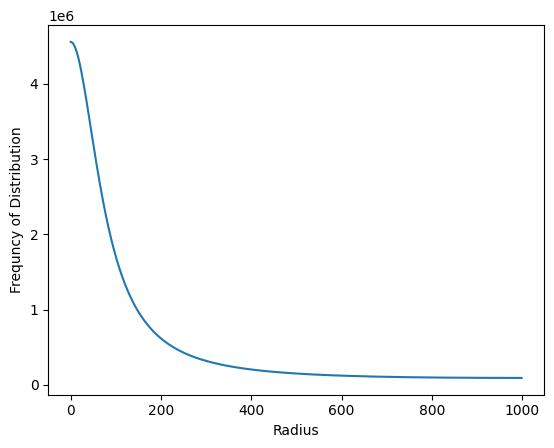

1.0


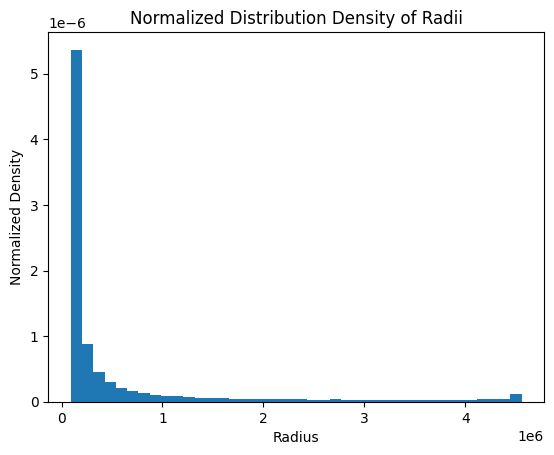

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.optimize import curve_fit
from scipy.constants import c
from collections import Counter

# Constants
G = 6.67430e-11  # Gravitational constant (m^3/kg/s^2)
M_sun = 1 * 1.989e30  # Mass of the Sun (kg)


def circular_orbit_velocity(r, M=M_sun):
    """Compute the circular orbital velocity at radius r."""
    return np.sqrt(G * M / r)

def specific_energy(r, v, M=M_sun):
    """Compute specific orbital energy."""
    return (v**2) / 2 - (G * M) / r

def new_orbit_circular(r, delta_v, M=M_sun):
    """Compute new orbital parameters after velocity change in a circular orbit."""

    # Initial velocity for a circular orbit
    v_initial = circular_orbit_velocity(r, M)

    # Apply velocity perturbation (assuming purely tangential boost)
    v_new = v_initial + delta_v

    # Compute new orbital energy
    E_initial = specific_energy(r, v_initial, M)
    E_new = specific_energy(r, v_new, M)

    #    # Initialize r_new before the conditional
    # r_new = float('nan')  # or any other suitable default value
    # a_new = float('nan')
    # deltaRadius = float('nan')
    # E_new = float('nan')

    # Determine new semi-major axis
    if E_new < 0:
        r_new = - (G * M) / (2 * E_new)
        #print(f"New bound orbit with semi-major axis: {r_new:.2e} m")
        a_new = - (G * M) / (2 * E_new * 1.496e11)
        #print(f"New bound orbit with semi-major axis: {a_new:.2e} AU")
        deltaRadius = (r_new - r)
        #print(f"Change of radius: {deltaRadius:.2e} m")
    else:
        a_new = r
        #print("Object has escaped into a hyperbolic trajectory.")

    # Energy change
    delta_E = E_new - E_initial
    #print(f"Change in specific energy: {delta_E:.2e} J/kg")

    return r_new, a_new, deltaRadius, E_new

# Example: Earth at 1 AU (initial circular orbit), receiving a velocity boost of 0.01c
r_earth =  1.496e11 * 1e-6    #minimum of Initial distance from Sun (m)
radius_dist = []

# Compute new orbit
for theta in np.linspace(0, np.pi, 1000):
  delta_v = 0.04 * c *np.cos(theta)   # 0.01c velocity boost (m/s)
  r_new, a_new, delta_r, delta_E = new_orbit_circular(r_earth, delta_v)

  if not np.isnan(r_new):
    radius_dist.append(r_new)


# #for theta in np.linspace(0, np.pi, 1000):
# theta = 0.0
# delta_v = 0.04 * c *np.cos(theta)   # 0.01c velocity boost (m/s)
# print(delta_v)
# r_new, a_new, delta_r, delta_E = new_orbit_circular(r_earth, delta_v)

# # if not np.isnan(r_new):
# # radius_dist = np.append(r_new)


plt.plot(radius_dist)
plt.xlabel('Radius')
plt.ylabel('Frequncy of Distribution')
plt.show()

# Calculate the frequency of each radius value
radius_counts = Counter(radius_dist)

# # Create scatter plot
# x_values = list(radius_counts.keys())
# y_values = list(radius_counts.values())

# plt.scatter(x_values, y_values)
# plt.xlabel('Radius')
# plt.ylabel('Frequency')
# plt.title('Distribution of Radii (Frequency)')
# plt.show()

# Create histogram with normalized density
hist, bins, patches = plt.hist(radius_dist, bins=40, density=True)  # Get histogram data
bin_widths = bins[1:] - bins[:-1]  # Calculate bin widths
normalized_density = hist / np.sum(hist * bin_widths)  # Normalize density
print(np.sum(hist * bin_widths))

# Plot normalized density
plt.bar(bins[:-1], normalized_density, width=bin_widths, align='edge')
plt.xlabel('Radius')
plt.ylabel('Normalized Density')
plt.title('Normalized Distribution Density of Radii')
plt.show()

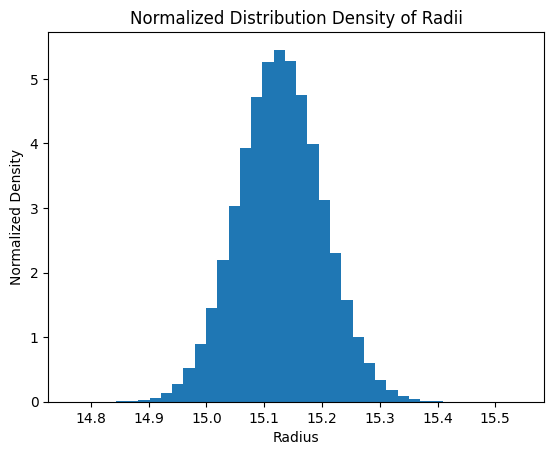

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.optimize import curve_fit
from scipy.constants import c
from collections import Counter
import sklearn as skl
from sklearn import preprocessing


# Constants
G = 6.67430e-11  # Gravitational constant (m^3/kg/s^2)
M_sun = 1 * 1.989e30  # Mass of the Sun (kg)


def circular_orbit_velocity(r, M=M_sun):
    """Compute the circular orbital velocity at radius r."""
    return np.sqrt(G * M / r)

def specific_energy(r, v, M=M_sun):
    """Compute specific orbital energy."""
    return (v**2) / 2 - (G * M) / r

def new_orbit_circular(r, delta_v, M=M_sun):
    """Compute new orbital parameters after velocity change in a circular orbit."""

    # Initial velocity for a circular orbit
    v_initial = circular_orbit_velocity(r, M)

    # Apply velocity perturbation (assuming purely tangential boost)
    v_new = v_initial + delta_v

    # Compute new orbital energy
    E_initial = specific_energy(r, v_initial, M)
    E_new = specific_energy(r, v_new, M)

    #    # Initialize r_new before the conditional
    # r_new = float('nan')  # or any other suitable default value
    # a_new = float('nan')
    # deltaRadius = float('nan')
    # E_new = float('nan')

    # Determine new semi-major axis
    if E_new < 0:
        r_new = abs(- (G * M) / (2 * E_new))

        r_new = abs(r_new)
        #print(f"New bound orbit with semi-major axis: {r_new:.2e} m")
        a_new = - (G * M) / (2 * E_new * 1.496e11)
        #print(f"New bound orbit with semi-major axis: {a_new:.2e} AU")
        deltaRadius = (r_new - r)
        #print(f"Change of radius: {deltaRadius:.2e} m")
    else:
        #a_new = r
        r_new = float('nan')  # or any other suitable default value
        a_new = float('nan')
        deltaRadius = float('nan')
        E_new = float('nan')
        # continue
        #print("Object has escaped into a hyperbolic trajectory.")

    # Energy change
    delta_E = E_new - E_initial
    #print(f"Change in specific energy: {delta_E:.2e} J/kg")

    return r_new, a_new, deltaRadius, E_new

# Example: Earth at 1 AU (initial circular orbit), receiving a velocity boost of 0.01c
r_earth =  1.496e11 * 1e-10  #minimum of Initial distance from Sun (m)
radius_dist = []
mu, sigma = 0.05488*c, 0.02355*c # mean and standard deviation

# Compute new orbit
for l in range(10000000):
  delta_v  = np.random.normal(mu, sigma) # 0.01c velocity boost (m/s)
  # if delta_v > 0.12*c:
  #   delta_v = 0.12*c
  r_new, a_new, delta_r, delta_E = new_orbit_circular(r_earth, delta_v)
  r_new = abs(r_new)
  # print(delta_v)
  #r_new = np.sqrt(r_new**2)
  if not np.isnan(r_new):

    radius_dist.append(np.sqrt(r_new**2))


# #for theta in np.linspace(0, np.pi, 1000):
# theta = 0.0
# delta_v = 0.04 * c *np.cos(theta)   # 0.01c velocity boost (m/s)
# print(delta_v)
# r_new, a_new, delta_r, delta_E = new_orbit_circular(r_earth, delta_v)

# # if not np.isnan(r_new):
# # radius_dist = np.append(r_new)


# plt.plot(radius_dist)
# plt.xlabel('Radius')
# plt.ylabel('Frequncy of Distribution')
# plt.show()

# # Calculate the frequency of each radius value
# radius_counts = Counter(radius_dist)


# print(radius_dist)
# Create histogram with normalized density
hist, bins, patches = plt.hist(radius_dist, bins=40, density=True)  # Get histogram data
bin_widths = bins[1:] - bins[:-1]  # Calculate bin widths
normalized_density = hist / np.sum(hist * bin_widths)  # Normalize density
# print(bins)

# Plot normalized density
plt.bar(bins[:-1], normalized_density, width=bin_widths, align='edge')
plt.xlabel('Radius')
plt.ylabel('Normalized Density')
plt.title('Normalized Distribution Density of Radii')
plt.xlabel('Radius')
plt.ylabel('Normalized Density')
plt.title('Normalized Distribution Density of Radii')
# plt.xlim(0, max(radius_dist))
# # plt.xlim(0.0005e5, 0.0015*1.6e5)
# plt.ylim(0, 20000)
plt.show()

#Relitavistic inclusion

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.optimize import curve_fit
from scipy.constants import c
from collections import Counter
import sklearn as skl
from sklearn import preprocessing


# Constants
G = 6.67430e-11  # Gravitational constant (m^3/kg/s^2)
M_sun = 1 * 1.989e30  # Mass of the Sun (kg)


def circular_orbit_velocity(r, M=M_sun):
    """Compute the circular orbital velocity at radius r."""
    return np.sqrt(G * M / r)

def specific_energy(r, v, M=M_sun):
    """Compute specific orbital energy."""
    gamma = 1 / np.sqrt(1 - v**2 / c**2)
    return (gamma -1)*c**2 - (G * gamma* M) / r

def new_orbit_circular(r, delta_v, M=M_sun):
    """Compute new orbital parameters after velocity change in a circular orbit."""

    # Initial velocity for a circular orbit
    v_initial = circular_orbit_velocity(r, M)

    # Apply velocity perturbation (assuming purely tangential boost)
    v_new = v_initial + delta_v

    # Compute new orbital energy
    E_initial = specific_energy(r, v_initial, M)
    E_new = specific_energy(r, v_new, M)

    #    # Initialize r_new before the conditional
    # r_new = float('nan')  # or any other suitable default value
    # a_new = float('nan')
    # deltaRadius = float('nan')
    # E_new = float('nan')

    # Determine new semi-major axis
    if E_new < 0:
        r_new = abs(- (G * M) / (2 * E_new))

        r_new = abs(r_new)
        #print(f"New bound orbit with semi-major axis: {r_new:.2e} m")
        a_new = - (G * M) / (2 * E_new * 1.496e11)
        #print(f"New bound orbit with semi-major axis: {a_new:.2e} AU")
        deltaRadius = (r_new - r)
        #print(f"Change of radius: {deltaRadius:.2e} m")
    else:
        #a_new = r
        r_new = float('nan')  # or any other suitable default value
        a_new = float('nan')
        deltaRadius = float('nan')
        E_new = float('nan')
        # continue
        #print("Object has escaped into a hyperbolic trajectory.")

    # Energy change
    delta_E = E_new - E_initial
    #print(f"Change in specific energy: {delta_E:.2e} J/kg")

    return r_new, a_new, deltaRadius, E_new

# Example: Earth at 1 AU (initial circular orbit), receiving a velocity boost of 0.01c
r_earth =  1.496e11 * 1e-10  #minimum of Initial distance from Sun (m)
radius_dist = []
mu, sigma = 0.05488*c, 0.02355*c # mean and standard deviation

# Compute new orbit
for l in range(10000000):
  delta_v  = np.random.normal(mu, sigma) # 0.01c velocity boost (m/s)
  # if delta_v > 0.12*c:
  #   delta_v = 0.12*c
  r_new, a_new, delta_r, delta_E = new_orbit_circular(r_earth, delta_v)
  r_new = abs(r_new)
  # print(delta_v)
  #r_new = np.sqrt(r_new**2)
  if not np.isnan(r_new):

    radius_dist.append(np.sqrt(r_new**2))


# #for theta in np.linspace(0, np.pi, 1000):
# theta = 0.0
# delta_v = 0.04 * c *np.cos(theta)   # 0.01c velocity boost (m/s)
# print(delta_v)
# r_new, a_new, delta_r, delta_E = new_orbit_circular(r_earth, delta_v)

# # if not np.isnan(r_new):
# # radius_dist = np.append(r_new)


# plt.plot(radius_dist)
# plt.xlabel('Radius')
# plt.ylabel('Frequncy of Distribution')
# plt.show()

# # Calculate the frequency of each radius value
# radius_counts = Counter(radius_dist)


# print(radius_dist)
# Create histogram with normalized density
hist, bins, patches = plt.hist(radius_dist, bins=40, density=True)  # Get histogram data
bin_widths = bins[1:] - bins[:-1]  # Calculate bin widths
normalized_density = hist / np.sum(hist * bin_widths)  # Normalize density
# print(bins)

# Plot normalized density
plt.bar(bins[:-1], normalized_density, width=bin_widths, align='edge')
plt.xlabel('Radius')
plt.ylabel('Normalized Density')
plt.title('Normalized Distribution Density of Radii')
plt.xlabel('Radius')
plt.ylabel('Normalized Density')
plt.title('Normalized Distribution Density of Radii')
# plt.xlim(0, max(radius_dist))
# # plt.xlim(0.0005e5, 0.0015*1.6e5)
# plt.ylim(0, 20000)
plt.show()

#Milky Way Distribution

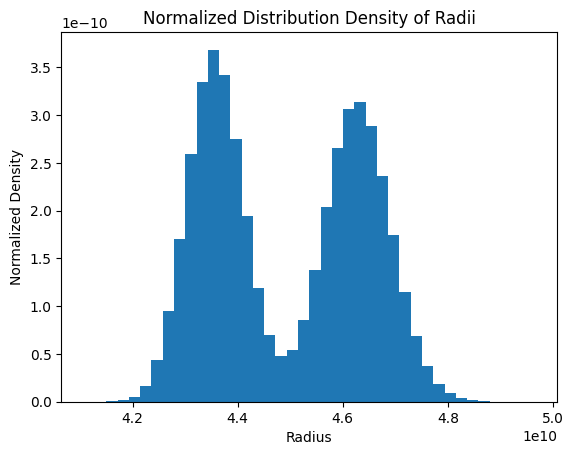

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.optimize import curve_fit
from scipy.constants import c
from collections import Counter
import sklearn as skl
from sklearn import preprocessing


# Constants
G = 6.67430e-11  # Gravitational constant (m^3/kg/s^2)
M_sun = 4e6 * 1.989e30  # Mass of the Galactic centre (kg)


def circular_orbit_velocity(r, M=M_sun):
    """Compute the circular orbital velocity at radius r."""
    return np.sqrt(G * M / r)

def specific_energy(r, v, M=M_sun):
    """Compute specific orbital energy."""
    return (v**2) / 2 - (G * M) / r

def new_orbit_circular(r, delta_v, M=M_sun):
    """Compute new orbital parameters after velocity change in a circular orbit."""

    # Initial velocity for a circular orbit
    v_initial = circular_orbit_velocity(r, M)

    # Apply velocity perturbation (assuming purely tangential boost)
    v_new = v_initial + delta_v

    # Compute new orbital energy
    E_initial = specific_energy(r, v_initial, M)
    E_new = specific_energy(r, v_new, M)

    #    # Initialize r_new before the conditional
    # r_new = float('nan')  # or any other suitable default value
    # a_new = float('nan')
    # deltaRadius = float('nan')
    # E_new = float('nan')

    # Determine new semi-major axis
    if E_new < 0:
        r_new = abs(- (G * M) / (2 * E_new))

        r_new = abs(r_new)
        #print(f"New bound orbit with semi-major axis: {r_new:.2e} m")
        a_new = - (G * M) / (2 * E_new * 1.496e11)
        #print(f"New bound orbit with semi-major axis: {a_new:.2e} AU")
        deltaRadius = (r_new - r)
        #print(f"Change of radius: {deltaRadius:.2e} m")
    else:
        #a_new = r
        r_new = 0.0  # or any other suitable default value
        a_new = float('nan')
        deltaRadius = float('nan')
        E_new = float('nan')
        # continue
        #print("Object has escaped into a hyperbolic trajectory.")

    # Energy change
    delta_E = E_new - E_initial
    #print(f"Change in specific energy: {delta_E:.2e} J/kg")

    return r_new, a_new, deltaRadius, E_new




r_earth =  1.496e11 * 0.3 #Radius of Sagitarrius B in m
radius_dist = []
mu, sigma = 0.005488*c, 0.002355*c # mean and standard deviation

# Compute new orbit for particle m
for m in range(1000000):
  delta_v  = np.random.normal(mu, sigma)

  # theta = 0.0
  #for theta in np.linspace(0, np.pi/2, 1000):
    #delta_v = np.cos(theta) * delta_v
  #   delta_v = 0.12*c
  r_new, a_new, delta_r, delta_E = new_orbit_circular(r_earth, delta_v)
  r_new = abs(r_new)
  # print(delta_v)
  #r_new = np.sqrt(r_new**2)
  if not np.isnan(r_new):

    radius_dist.append(np.sqrt(r_new**2))

# Compute new orbit for particle n
for n in range(1000000):
  delta_v  = -1*np.random.normal(mu, sigma)

  # theta = 0.0
  #for theta in np.linspace(0, np.pi/2, 1000):
    #delta_v = np.cos(theta) * delta_v
  #   delta_v = 0.12*c
  r_new, a_new, delta_r, delta_E = new_orbit_circular(r_earth, delta_v)
  r_new = abs(r_new)
  # print(delta_v)
  #r_new = np.sqrt(r_new**2)
  if not np.isnan(r_new):

    radius_dist.append(np.sqrt(r_new**2))




# plt.plot(radius_dist)
# plt.xlabel('Radius')
# plt.ylabel('Frequncy of Distribution')
# plt.show()

# # Calculate the frequency of each radius value
# radius_counts = Counter(radius_dist)


# print(radius_dist)
# Create histogram with normalized density
hist, bins, patches = plt.hist(radius_dist, bins=40, density=True)  # Get histogram data
bin_widths = bins[1:] - bins[:-1]  # Calculate bin widths
normalized_density = hist / np.sum(hist * bin_widths)  # Normalize density
# print(bins)

# Plot normalized density
plt.bar(bins[:-1], normalized_density, width=bin_widths, align='edge')
plt.xlabel('Radius')
plt.ylabel('Normalized Density')
plt.title('Normalized Distribution Density of Radii')
plt.xlabel('Radius')
plt.ylabel('Normalized Density')
plt.title('Normalized Distribution Density of Radii')
# plt.xlim(0, max(radius_dist))
# # plt.xlim(0.0005e5, 0.0015*1.6e5)
# plt.ylim(0, 20000)
plt.show()

Milky way with set distances from 0.1 to 0.3 A.U. (galatic core mass of Sag A*)

Uniform DM distribution

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.optimize import curve_fit
from scipy.constants import c
from collections import Counter
import sklearn as skl
from sklearn import preprocessing


# Constants
G = 6.67430e-11  # Gravitational constant (m^3/kg/s^2)
M_sun = 4e6 * 1.989e30  # Mass of the Galactic centre (kg)


def circular_orbit_velocity(r, M=M_sun):
    """Compute the circular orbital velocity at radius r."""
    return np.sqrt(G * M / r)

def specific_energy(r, v, M=M_sun):
    """Compute specific orbital energy."""
    return (v**2) / 2 - (G * M) / r

def new_orbit_circular(r, delta_v, M=M_sun):
    """Compute new orbital parameters after velocity change in a circular orbit."""

    # Initial velocity for a circular orbit
    v_initial = circular_orbit_velocity(r, M)

    # Apply velocity perturbation (assuming purely tangential boost)
    v_new = v_initial + delta_v

    # Compute new orbital energy
    E_initial = specific_energy(r, v_initial, M)
    E_new = specific_energy(r, v_new, M)

    #    # Initialize r_new before the conditional
    # r_new = float('nan')  # or any other suitable default value
    # a_new = float('nan')
    # deltaRadius = float('nan')
    # E_new = float('nan')

    # Determine new semi-major axis
    if E_new < 0:
        r_new = abs(- (G * M) / (2 * E_new))

        r_new = abs(r_new)
        #print(f"New bound orbit with semi-major axis: {r_new:.2e} m")
        a_new = - (G * M) / (2 * E_new * 1.496e11)
        #print(f"New bound orbit with semi-major axis: {a_new:.2e} AU")
        deltaRadius = (r_new - r)
        #print(f"Change of radius: {deltaRadius:.2e} m")
    else:
        #a_new = r
        r_new = 0.0  # or any other suitable default value
        a_new = float('nan')
        deltaRadius = float('nan')
        E_new = float('nan')
        # continue
        #print("Object has escaped into a hyperbolic trajectory.")

    # Energy change
    delta_E = E_new - E_initial
    #print(f"Change in specific energy: {delta_E:.2e} J/kg")

    return r_new, a_new, deltaRadius, E_new




r_earth =  1.496e11 * 0.3  #Radius of Sagitarrius B in m
radius_dist = []
mu, sigma = 0.005488*c, 0.002355*c # mean and standard deviation

low = 1
high = 5.5e9
size = 10000000000
uniform_dist = np.random.uniform(low=low, high=high, size=size)
# max milky way radius 5527153635.24

for value in uniform_dist:
  r_earth =  1.496e11 * value  #Radius of Sagitarrius B in m
# Compute new orbit for particle m
  # for m in range(100000):
  delta_v  = np.random.normal(mu, sigma)

  # theta = 0.0
  #for theta in np.linspace(0, np.pi/2, 1000):
    #delta_v = np.cos(theta) * delta_v
  #   delta_v = 0.12*c
  r_new, a_new, delta_r, delta_E = new_orbit_circular(r_earth, delta_v)
  r_new = abs(r_new)
  # print(delta_v)
  #r_new = np.sqrt(r_new**2)
  if not np.isnan(r_new):

    radius_dist.append(np.sqrt(r_new**2))

  # Compute new orbit for particle n
  # for n in range(100000):
  #check conservation of E and beta of n
  delta_v  = -1*np.random.normal(mu, sigma)

  # theta = 0.0
  #for theta in np.linspace(0, np.pi/2, 1000):
    #delta_v = np.cos(theta) * delta_v
  #   delta_v = 0.12*c
  r_new, a_new, delta_r, delta_E = new_orbit_circular(r_earth, delta_v)
  r_new = abs(r_new)
  # print(delta_v)
  #r_new = np.sqrt(r_new**2)
  if not np.isnan(r_new):

    radius_dist.append(np.sqrt(r_new**2))




# plt.plot(radius_dist)
# plt.xlabel('Radius')
# plt.ylabel('Frequncy of Distribution')
# plt.show()

# # Calculate the frequency of each radius value
# radius_counts = Counter(radius_dist)


# print(radius_dist)
# Create histogram with normalized density
hist, bins, patches = plt.hist(radius_dist, bins=1000, density=True)  # Get histogram data
bin_widths = bins[1:] - bins[:-1]  # Calculate bin widths
normalized_density = hist / np.sum(hist * bin_widths)  # Normalize density
# print(bins)

# Plot normalized density
plt.bar(bins[:-1], normalized_density, width=bin_widths, align='edge')
plt.xlabel('Radius')
plt.ylabel('Normalized Density')
plt.title('Normalized Distribution Density of Radii')
plt.xlabel('Radius')
plt.ylabel('Normalized Density')
plt.title('Normalized Distribution Density of Radii')
# plt.xlim(0, 0.00005*max(radius_dist))
# # plt.xlim(0.0005e5, 0.0015*1.6e5)
# plt.ylim(0, 20000)
plt.show()

KeyboardInterrupt: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.optimize import curve_fit
from scipy.constants import c
from collections import Counter
import sklearn as skl
from sklearn import preprocessing
import math
from scipy.stats import loguniform

# Constants
G = 6.67430e-11  # Gravitational constant (m^3/kg/s^2)
M_sun = 4e6 * 1.989e30  # Mass of the Galactic centre (kg)


def circular_orbit_velocity(r, M=M_sun):
    """Compute the circular orbital velocity at radius r."""
    return np.sqrt(G * M / r)

def specific_energy(r, v, M=M_sun):
    """Compute specific orbital energy."""
    return (v**2) / 2 - (G * M) / r

def new_orbit_circular(r, delta_v, M=M_sun):
    """Compute new orbital parameters after velocity change in a circular orbit."""

    # Initial velocity for a circular orbit
    v_initial = circular_orbit_velocity(r, M)

    # Apply velocity perturbation (assuming purely tangential boost)
    v_new = v_initial + delta_v

    # Compute new orbital energy
    E_initial = specific_energy(r, v_initial, M)
    E_new = specific_energy(r, v_new, M)

    #    # Initialize r_new before the conditional
    # r_new = float('nan')  # or any other suitable default value
    # a_new = float('nan')
    # deltaRadius = float('nan')
    # E_new = float('nan')

    # Determine new semi-major axis
    if E_new < 0:
        r_new = abs(- (G * M) / (2 * E_new))

        r_new = abs(r_new)
        #print(f"New bound orbit with semi-major axis: {r_new:.2e} m")
        a_new = - (G * M) / (2 * E_new * 1.496e11)
        #print(f"New bound orbit with semi-major axis: {a_new:.2e} AU")
        deltaRadius = (r_new - r)
        #print(f"Change of radius: {deltaRadius:.2e} m")
    else:
        #a_new = r
        r_new = 0.0  # or any other suitable default value
        a_new = float('nan')
        deltaRadius = float('nan')
        E_new = float('nan')
        # continue
        #print("Object has escaped into a hyperbolic trajectory.")

    # Energy change
    delta_E = E_new - E_initial
    #print(f"Change in specific energy: {delta_E:.2e} J/kg")

    return r_new, a_new, deltaRadius, E_new




r_earth =  1.496e11 * 0.3  #Radius of Sagitarrius B in m
radius_dist = []
rad_pc = []
mu, sigma = 0.0005488*c, 0.0092355*c # mean and standard deviation

low = 0.00001
high = 26000#2062648826 * 6 #10000 ly
size = 100000

# rand_loguni =  loguniform.rvs(low, high, size=size)

uniform_dist = np.random.uniform(low=low, high=high, size=size)
# max milky way radius 5527153635.24

# for number in rand_loguni:
for value in uniform_dist:
  #r_earth =  1.496e11 * number  #Radius of Sagitarrius B in m
  r_earth =  30856778570831268 * value  #Radius of Sagitarrius B in m from pc
# Compute new orbit for particle m
  # for m in range(100000):
  delta_v  = np.random.normal(mu, sigma)

  # theta = 0.0
  #for theta in np.linspace(0, np.pi/2, 1000):
    #delta_v = np.cos(theta) * delta_v
  #   delta_v = 0.12*c
  r_new, a_new, delta_r, delta_E = new_orbit_circular(r_earth, delta_v)
  r_new = abs(r_new)
  r_pc_new = r_new/3.086e18

  # print(delta_v)
  #r_new = np.sqrt(r_new**2)
  if not np.isnan(r_new) and E_new < 0:
    r_new = max(r_new, 1e-10)  # Ensure r_new is at least 1e-10
    # rad_pc.append(np.log(np.sqrt(r_new**2)/3.086e18))
    # radius_dist.append(np.log(np.sqrt((r_new**2))))
    rad_pc.append(np.sqrt(r_pc_new**2))
    radius_dist.append(np.sqrt(r_new**2))

  # Compute new orbit for particle n
  # for n in range(100000):
  #check conservation of E and beta of n
  delta_v  = -1*np.random.normal(mu, sigma)

  # theta = 0.0
  #for theta in np.linspace(0, np.pi/2, 1000):
    #delta_v = np.cos(theta) * delta_v
  #   delta_v = 0.12*c
  r_new, a_new, delta_r, delta_E = new_orbit_circular(r_earth, delta_v)
  r_new = abs(r_new)
  r_pc_new = r_new/3.086e18
  # print(r_pc_new)
  # print(delta_v)
  #r_new = np.sqrt(r_new**2)
  if not np.isnan(r_new) and E_new < 0:
    r_new = max(r_new, 1e-10)  # Ensure r_new is at least 1e-10
    rad_pc.append(np.sqrt(r_pc_new**2))
    radius_dist.append(np.sqrt((r_new**2)))




# plt.plot(radius_dist)
# plt.xlabel('Radius')
# plt.ylabel('Frequncy of Distribution')
# plt.show()

# # Calculate the frequency of each radius value
# radius_counts = Counter(radius_dist)


# print(radius_dist)
# Create histogram with normalized density
hist, bins, patches = plt.hist(radius_dist, bins='auto', density=True)  # Get histogram data
bin_widths = bins[1:] - bins[:-1]  # Calculate bin widths
normalized_density = hist / np.sum(hist * bin_widths)  # Normalize density
# print(bins)

# Plot normalized density
plt.bar(bins[:-1], normalized_density, width=bin_widths, align='edge')
plt.xlabel('Radius')
plt.ylabel('Normalized Density')
plt.title('Normalized Distribution Density of Radii')
plt.xlabel('Radius')
plt.ylabel('Normalized Density')
plt.title('Normalized Distribution Density of Radii')
plt.xscale('log')
plt.yscale('log')
# plt.xlim(0, 0.00005*max(radius_dist))
# # plt.xlim(0.0005e5, 0.0015*1.6e5)
# plt.ylim(0, 20000)
# plt.show()

hist2, bins2, patches2 = plt.hist(rad_pc, bins=10000, density=True)  # Get histogram data
bin_widths2 = bins2[1:] - bins2[:-1]  # Calculate bin widths
normalized_density2 = hist2 / np.sum(hist2 * bin_widths2)  # Normalize density
# print(bins)

# Plot normalized density
plt.bar(bins2[:-1], normalized_density2, width=bin_widths2, align='edge')
plt.xlabel('Radius (pc)')
plt.ylabel('Normalized Density')
plt.title('Normalized Distribution Density of Radii')
plt.xscale('log')
plt.yscale('log')
# plt.xlim(0, 0.00005*max(radius_dist))
# # plt.xlim(0.0005e5, 0.0015*1.6e5)
# plt.ylim(0, 20000)
plt.show()

NameError: name 'E_new' is not defined

In [ ]:
low = 1e-4#2062.65
high = 26800  #5527898853.95 #10000 ly
size = 100

rand_loguni =  loguniform.rvs(low, high, size=size)
print(rand_loguni)

[6.28145175e-01 3.78894852e-04 6.95186192e+00 2.93758515e+02
 1.75583707e-03 1.62948526e-03 6.71577795e-03 3.39241798e-02
 2.23823369e-01 6.58328763e+00 3.91952040e-03 1.04070921e-01
 3.95849589e+01 8.34548059e-04 1.70653866e+01 4.92742154e+02
 1.54101074e+04 7.35162702e-04 3.58841367e+01 7.87567162e+00
 4.64427493e+01 4.23856244e+03 3.17809096e-02 1.61317249e+04
 9.44289336e+00 1.55589871e-04 2.03875031e-04 7.55152087e+01
 4.85008658e+00 6.40858102e-03 4.75337585e+03 8.94420910e-01
 6.35073564e-02 9.83803646e-01 3.55910507e-04 2.22854167e+03
 2.79276230e+01 1.15022625e-03 1.63765097e+00 5.40678398e+01
 2.46890055e-04 1.85037663e-02 2.24493392e+00 2.05831901e+00
 1.47674921e+02 3.00803917e+01 5.71132829e+03 1.14891731e+04
 5.71047549e+02 1.67513358e+00 1.66959952e-02 1.76742519e-03
 2.70487189e-02 4.57694292e+03 6.05293645e+00 1.76678043e-03
 4.79017600e-03 1.52680629e+04 2.31085158e+00 3.75465975e-01
 1.58998435e-04 5.00227707e-03 1.99844127e+03 5.21022702e+00
 3.61072581e-03 2.702862

In [ ]:
!pip install matplotlib --upgrade

/usr/local/lib/python3.11/dist-packages/numpy/lib/_histograms_impl.py:895: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


KeyboardInterrupt: 

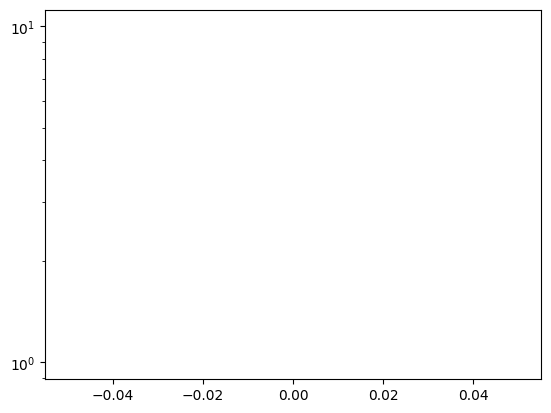

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.optimize import curve_fit
from scipy.constants import c
from collections import Counter
import sklearn as skl
from sklearn import preprocessing
import math
from scipy.stats import loguniform

# Constants
G = 6.67430e-11  # Gravitational constant (m^3/kg/s^2)
M_sun = 4e6 * 1.989e30  # Mass of the Galactic centre (kg)
pc = 3.086e18



def circular_orbit_velocity(r, M=M_sun):
    """Compute the circular orbital velocity at radius r."""
    return np.sqrt(G * M / (r * pc))

def specific_energy(r, v, M=M_sun):
    """Compute specific orbital energy."""
    return (v**2) / 2 - (G * M) / (r* pc)

def new_orbit_circular(r, delta_v, M=M_sun):
    """Compute new orbital parameters after velocity change in a circular orbit."""

    # Initial velocity for a circular orbit
    v_initial = circular_orbit_velocity(r, M)

    # Apply velocity perturbation (assuming purely tangential boost)
    v_new = v_initial + delta_v

    # Compute new orbital energy
    E_initial = specific_energy(r, v_initial, M)
    E_new = specific_energy(r, v_new, M)

    # Determine new semi-major axis
    if E_new < 0:
        r_new = abs(- (G * M) / (2 * E_new))

        r_new = abs(r_new)
        #print(f"New bound orbit with semi-major axis: {r_new:.2e} m")
        a_new = - (G * M) / (2 * E_new * 1.496e11)
        #print(f"New bound orbit with semi-major axis: {a_new:.2e} AU")
        deltaRadius = (r_new - r)
        #print(f"Change of radius: {deltaRadius:.2e} m")
    else:
        #a_new = r
        r_new = float('nan')#0.5e-3 *1.496e11  # or any other suitable default value
        a_new = float('nan')
        deltaRadius = float('nan')
        E_new = float('nan')
        # continue
        #print("Object has escaped into a hyperbolic trajectory.")

    # Energy change
    delta_E = E_new - E_initial
    #print(f"Change in specific energy: {delta_E:.2e} J/kg")

    return r_new, a_new, deltaRadius, E_new




r_earth =  1.496e11 * 0.3  #Radius of Sagitarrius B in m
radius_dist = []
rad_pc = []
mu, sigma = 0.005488*c, 0.0092355*c # mean and standard deviation

low = 0.001#2062.65
high = 26800  #5527898853.95 #10000 ly
size = 1000

rand_loguni =  loguniform.rvs(low, high, size=size)

# uniform_dist = np.random.uniform(low=low, high=high, size=size)
# max milky way radius 5527153635.24

for number in rand_loguni:
# for value in uniform_dist:
  r_earth =  number  #Radius of Sagitarrius B in m
  # r_earth =  30856778570831268 * value  #Radius of Sagitarrius B in m from pc
# Compute new orbit for particle m

  delta_v_m  = np.random.normal(mu, sigma)


  r_new, a_new, delta_r, E_new = new_orbit_circular(r_earth, delta_v_m)
  r_new = abs(r_new)
  r_pc_new = r_new

  if not np.isnan(r_new) and E_new < 0:
    r_new = max(r_new, 1e-7)  # Ensure r_new is at least 1e-10
    # rad_pc.append(np.log((np.sqrt(r_new**2)/30856778570831268)))
    # radius_dist.append(np.log(np.sqrt((r_new**2))))
    rad_pc.append(np.sqrt(r_new**2))
    #radius_dist.append(np.sqrt(r_new**2))

  # Compute new orbit for particle n
  # for n in range(100000):
  #check conservation of E and beta of n
  delta_v_n  = -1*np.random.normal(mu, sigma)

  # theta = 0.0
  #for theta in np.linspace(0, np.pi/2, 1000):
    #delta_v = np.cos(theta) * delta_v
  #   delta_v = 0.12*c
  r_new, a_new, delta_r, delta_E = new_orbit_circular(r_earth, delta_v_n)
  r_new = abs(r_new)
  r_pc_new = r_new
  # print(r_pc_new)
  # print(delta_v)
  #r_new = np.sqrt(r_new**2)
  if not np.isnan(r_new) and E_new < 0:
    r_new = max(r_new, 1e-7)  # Ensure r_new is at least 1e-10
    # rad_pc.append(np.log((np.sqrt(r_new**2)/30856778570831268)))
    # radius_dist.append(np.log(np.sqrt((r_new**2))))
    rad_pc.append(np.sqrt(r_new**2))
    #radius_dist.append(np.sqrt(r_new**2))






# print(radius_dist)
# Create histogram with normalized density
hist, bins, patches = plt.hist(radius_dist, bins='auto', density=True)  # Get histogram data
# Calculate logarithmic bin widths
bin_widths = np.diff(bins)

# Normalize histogram by logarithmic bin widths
normalized_density = hist / bin_widths
# print(bins)

# Plot normalized density
# plt.bar(bins[:-1], normalized_density, width=bin_widths, align='edge')
# plt.xlabel('Radius')
# plt.ylabel('Normalized Density')
# plt.title('Normalized Distribution Density of Radii')
# plt.xlabel('Radius')
# plt.ylabel('Normalized Density')
# plt.title('Normalized Distribution Density of Radii')
# plt.xscale('log')
# plt.yscale('log')
# # plt.xlim(0, 0.00005*max(radius_dist))
# # # plt.xlim(0.0005e5, 0.0015*1.6e5)
# # plt.ylim(0, 20000)
# plt.show()

hist2, bins2, patches2 = plt.hist(rad_pc, bins='auto', density=True, log=True)  # Get histogram data
# Calculate logarithmic bin widths
bin_widths2 = np.diff(bins2)

# Normalize histogram by logarithmic bin widths
normalized_density2 = hist2 / bin_widths2
# print(bins)

# Plot normalized density
plt.bar(bins2[:-1], normalized_density2, width=bin_widths2, align='edge')
plt.xlabel('Radius (pc)')
plt.ylabel('Normalized Density')
plt.title('Normalized Distribution Density of Radii')
plt.xscale('log')
plt.yscale('log')
# plt.xlim(1e-4, 1e4)
# # plt.xlim(0.0005e5, 0.0015*1.6e5)
# plt.ylim(0, 20000)
plt.show()

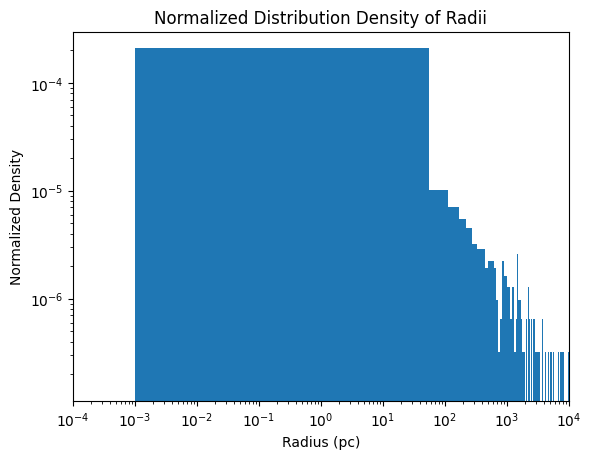

In [ ]:

# Plot normalized density
plt.bar(bins2[:-1], normalized_density2, width=bin_widths2, align='edge')
plt.xlabel('Radius (pc)')
plt.ylabel('Normalized Density')
plt.title('Normalized Distribution Density of Radii')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-4, 1e4)
# # plt.xlim(0.0005e5, 0.0015*1.6e5)
# plt.ylim(0, 20000)
plt.show()

Log unifrom with numpy

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.optimize import curve_fit
from scipy.constants import c
from collections import Counter
import sklearn as skl
from sklearn import preprocessing
import math
from scipy.stats import loguniform

# Constants
G = 6.67430e-11  # Gravitational constant (m^3/kg/s^2)
M_sun = 4e6 * 1.989e30  # Mass of the Galactic centre (kg)
pc = 30856778570831268


def circular_orbit_velocity(r, M=M_sun):
    """Compute the circular orbital velocity at radius r."""
    return np.sqrt(G * M / (r * pc))

def specific_energy(r, v, M=M_sun):
    """Compute specific orbital energy."""
    return (v**2) / 2 - (G * M) / (r* pc)


def new_orbit_circular(r, delta_v, M=M_sun):
    """Compute new orbital parameters after velocity change in a circular orbit."""

    # Initial velocity for a circular orbit
    v_initial = circular_orbit_velocity(r, M)

    # Apply velocity perturbation (assuming purely tangential boost)
    v_new = v_initial + delta_v

    # Compute new orbital energy
    E_initial = specific_energy(r, v_initial, M)
    E_new = specific_energy(r, v_new, M)

    # Determine new semi-major axis
    if E_new < 0:
        r_new = abs(- (G * M) / (2 * E_new))

        r_new = abs(r_new)
        #print(f"New bound orbit with semi-major axis: {r_new:.2e} m")
        a_new = - (G * M) / (2 * E_new * 1.496e11)
        #print(f"New bound orbit with semi-major axis: {a_new:.2e} AU")
        deltaRadius = (r_new - r)
        #print(f"Change of radius: {deltaRadius:.2e} m")
    else:
        #a_new = r
        r_new = float('nan')#0.5e-3 *1.496e11  # or any other suitable default value
        a_new = float('nan')
        deltaRadius = float('nan')
        E_new = float('nan')
        # continue
        #print("Object has escaped into a hyperbolic trajectory.")

    # Energy change
    delta_E = E_new - E_initial
    #print(f"Change in specific energy: {delta_E:.2e} J/kg")

    return r_new, a_new, deltaRadius, E_new




r_earth =  1.496e11 * 0.3  #Radius of Sagitarrius B in m
radius_dist = []
rad_pc = []
mu, sigma = 0.005488*c, 0.0092355*c # mean and standard deviation

low = 0.001#2062.65
high = 26800  #5527898853.95 #10000 ly
size = 10000
print(np.log10(low), np.log10(high))
distances = np.logspace(np.log10(low), np.log10(high), size)
# uniform_dist = np.random.uniform(low=low, high=high, size=size)
# max milky way radius 5527153635.24

#Resample distances using inverse transform sampling
def resample_distances(distances, num_samples):
    # Calculate the cumulative distribution function (CDF)
    cdf = np.cumsum(distances) / np.sum(distances)

    # Generate random numbers between 0 and 1
    random_numbers = np.random.rand(num_samples)

    # Use inverse transform sampling to get new distances
    resampled_distances = np.interp(random_numbers, cdf, distances)

    return resampled_distances

# Get resampled distances
numbers = resample_distances(distances, size)
# print("numbers", numbers)


#for _ in range(size):

for numbers in distances:
# for value in uniform_dist:
  # resampled_distances = resample_distances(distances, 1)  # Get 1 resampled distance
  # number = resampled_distances[0]  # Extract the resampled distance
  # # print(number)
  # number = np.random.choice(distances)

  r_earth = numbers  #Radius of Sagitarrius B in m
  # r_earth =  30856778570831268 * value  #Radius of Sagitarrius B in m from pc
# Compute new orbit for particle m
  # print(r_earth)
  delta_v_m  = np.random.normal(mu, sigma)


  r_new, a_new, delta_r, E_new = new_orbit_circular(r_earth, delta_v_m)
  r_new = abs(r_new)
  r_pc_new = r_new

  if not np.isnan(r_new) and E_new < 0 and (1e-7 <= r_new/pc <= 1e7):
    # rad_pc.append(np.log((np.sqrt(r_new**2)/30856778570831268)))
    # radius_dist.append(np.log(np.sqrt((r_new**2))))
    rad_pc.append(np.sqrt(r_new**2)/pc)
    radius_dist.append(np.sqrt(r_new**2))

  # Compute new orbit for particle n
  # for n in range(100000):
  #check conservation of E and beta of n
  delta_v_n  = -1*np.random.normal(mu, sigma)

  # theta = 0.0
  #for theta in np.linspace(0, np.pi/2, 1000):
    #delta_v = np.cos(theta) * delta_v
  #   delta_v = 0.12*c
  r_new, a_new, delta_r, delta_E = new_orbit_circular(r_earth, delta_v_n)
  r_new = abs(r_new)
  r_pc_new = r_new
  # print(r_new)
  # print(r_pc_new)
  # print(delta_v)
  #r_new = np.sqrt(r_new**2)
  if not np.isnan(r_new) and E_new < 0 and (1e-7 <= r_new/pc <= 1e7):
    # rad_pc.append(np.log((np.sqrt(r_new**2)/30856778570831268)))
    # radius_dist.append(np.log(np.sqrt((r_new**2))))
    rad_pc.append(np.sqrt(r_new**2)/pc)
    radius_dist.append(np.sqrt(r_new**2))






# print(radius_dist)
# Create histogram with normalized density
hist, bins, patches = plt.hist(radius_dist, bins='auto', density=True)  # Get histogram data
# Calculate logarithmic bin widths
bin_widths = np.diff(bins)

# Normalize histogram by logarithmic bin widths
normalized_density = hist / bin_widths
# print(bins)

# Plot normalized density
# plt.bar(bins[:-1], normalized_density, width=bin_widths, align='edge')
# plt.xlabel('Radius')
# plt.ylabel('Normalized Density')
# plt.title('Normalized Distribution Density of Radii')
# plt.xlabel('Radius')
# plt.ylabel('Normalized Density')
# plt.title('Normalized Distribution Density of Radii')
# plt.xscale('log')
# plt.yscale('log')
# # plt.xlim(0, 0.00005*max(radius_dist))
# # # plt.xlim(0.0005e5, 0.0015*1.6e5)
# # plt.ylim(0, 20000)
# plt.show()
# print(np.min(number))
# print(np.min(rad_pc))
print(np.min(distances))
# # print(np.min(radius_dist))
# print(np.min(resampled_distances))

# hist2, bins2, patches2 = plt.hist(rad_pc, bins='auto', density=True, log=True)  # Get histogram data
# Calculate logarithmic bin widths
# Plot normalized density

hist2, bins2, patches2 = plt.hist(rad_pc, bins='auto', density=True, log=True)  # Get histogram data
# Calculate logarithmic bin widths
bin_widths2 = np.diff(bins2)

# Normalize histogram by logarithmic bin widths
normalized_density2 = hist2 / bin_widths2
# print(bins)

# Plot normalized density
plt.bar(bins2[:-1], normalized_density2, width=bin_widths2, align='edge')
plt.xlabel('Radius (pc)')
plt.ylabel('Normalized Density')
plt.title('Normalized Distribution Density of Radii')
plt.xscale('log')
plt.yscale('log')
# plt.xlim(1e-4, 1e4)
# # plt.xlim(0.0005e5, 0.0015*1.6e5)
# plt.ylim(0, 20000)
plt.show()

plt.hist(rad_pc, bins=50, log=True, edgecolor='black', alpha=0.7)  # Log binning
plt.xlabel('Radius (pc)')
plt.ylabel('Normalized Density')
plt.title('Normalized Distribution Density of Radii')
plt.xscale('log')
plt.yscale('log')
# plt.xlim(1e-4, 1e4)
# # plt.xlim(0.0005e5, 0.0015*1.6e5)
# plt.ylim(0, 20000)
plt.show()

KeyboardInterrupt: 

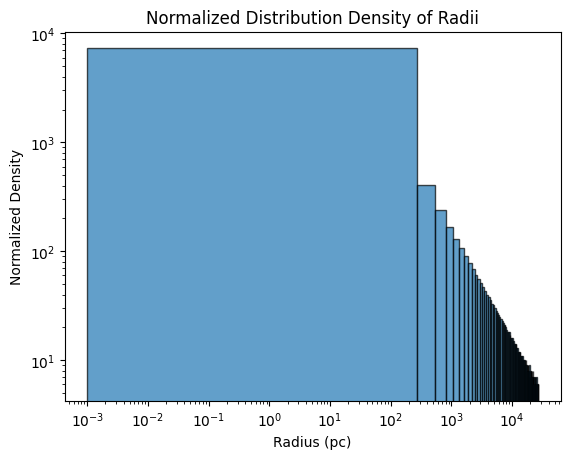

In [ ]:


plt.hist(distances, bins=100, edgecolor='black', alpha=0.7)  # Log binning
plt.xlabel('Radius (pc)')
plt.ylabel('Normalized Density')
plt.title('Normalized Distribution Density of Radii')
plt.xscale('log')
plt.yscale('log')
# plt.xlim(1e-4, 1e4)
# # plt.xlim(0.0005e5, 0.0015*1.6e5)
# plt.ylim(0, 20000)
plt.show()

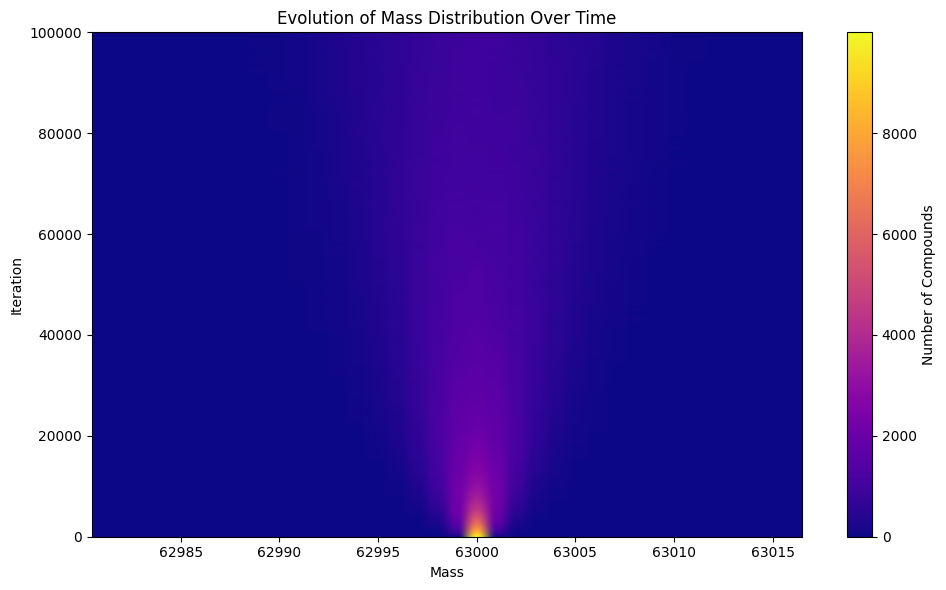

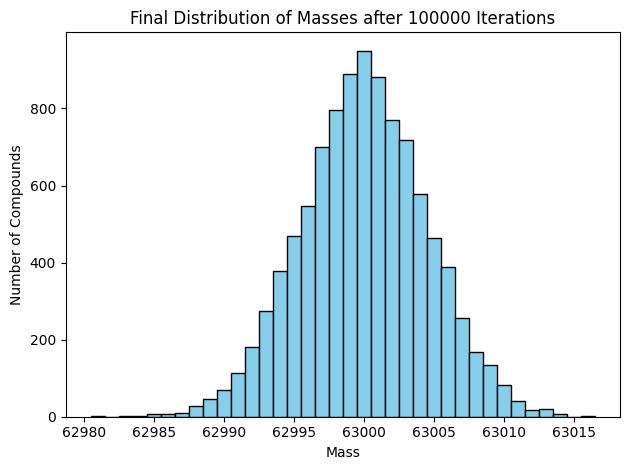

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Simulation Parameters ---
n_particles = 10000         # Number of compounds/particles
initial_mass = 63000         # All compounds start with the same mass
n_iterations = 100000     # Total number of donation events
snapshot_interval = 10   # Record a snapshot of the masses every 100 iterations

# --- Initialize the System ---
masses = np.full(n_particles, initial_mass, dtype=int)
snapshots = []  # To record mass distributions over time

# --- Simulation Loop ---
# At each iteration, randomly select two different compounds.
# Randomly choose which one donates (if it has mass > 0), and the other receives 1 mass unit.
for t in range(n_iterations):
    # Choose two distinct compounds
    i, j = np.random.choice(n_particles, size=2, replace=False)

    # Randomly decide which one is the donor (with 50% chance each)
    if np.random.rand() < 0.5:
        donor, receiver = i, j
    else:
        donor, receiver = j, i

    # Ensure the donor has at least one mass unit to give
    if masses[donor] > 0:
        masses[donor] -= 1
        masses[receiver] += 1

    # Record a snapshot at specified intervals
    if t % snapshot_interval == 0:
        snapshots.append(masses.copy())

# --- Plot the Final Distribution as a Histogram ---
plt.figure(figsize=(8, 6))
# Create bins that cover the integer masses (offset by 0.5 to center the bars)
bins_hist = np.arange(masses.min() - 0.5, masses.max() + 1.5, 1)
plt.hist(masses, bins=bins_hist, edgecolor='black', color='skyblue')
plt.xlabel("Mass")
plt.ylabel("Number of Compounds")
plt.title(f"Final Distribution of Masses after {n_iterations} Iterations")
plt.tight_layout()
plt.savefig("final_mass_distribution.png")
plt.close()

# --- Build a Heatmap Showing the Evolution of the Mass Distribution ---
# First, we convert each snapshot to a histogram.
snapshots = np.array(snapshots)  # Shape: (n_snapshots, n_particles)
# Determine a common range for mass values
min_mass = snapshots.min()
max_mass = snapshots.max()
bins_edges = np.arange(min_mass - 0.5, max_mass + 1.5, 1)
bin_centers = (bins_edges[:-1] + bins_edges[1:]) / 2

# Compute a histogram for each snapshot.
hist_evolution = []
for snapshot in snapshots:
    hist, _ = np.histogram(snapshot, bins=bins_edges)
    hist_evolution.append(hist)
hist_evolution = np.array(hist_evolution)  # Shape: (n_snapshots, number of bins)

# Create a time array corresponding to snapshots.
n_snapshots = hist_evolution.shape[0]
time_axis = np.arange(0, n_iterations + 1, snapshot_interval)

# ax.ticklabel_format(style='plain', axis='x')  # Use 'plain' style for normal numbers

plt.figure(figsize=(10, 6))
# Use imshow to display the heatmap.
# extent: [mass_min, mass_max, time_min, time_max]
plt.imshow(hist_evolution, aspect='auto', origin='lower',
           extent=[bins_edges[0], bins_edges[-1], time_axis[0], time_axis[-1]],
           cmap='plasma')
plt.xlabel("Mass")
plt.ylabel("Iteration")
plt.title("Evolution of Mass Distribution Over Time")
cbar = plt.colorbar()
cbar.set_label("Number of Compounds")
plt.tight_layout()
plt.savefig("mass_distribution_evolution.png")
plt.show()

plt.hist(masses, bins=bins_hist, edgecolor='black', color='skyblue')
plt.xlabel("Mass")
# plt.xlim(66000,70000)
plt.ylabel("Number of Compounds")
plt.title(f"Final Distribution of Masses after {n_iterations} Iterations")
plt.tight_layout()



-8.0 1.428134794028789


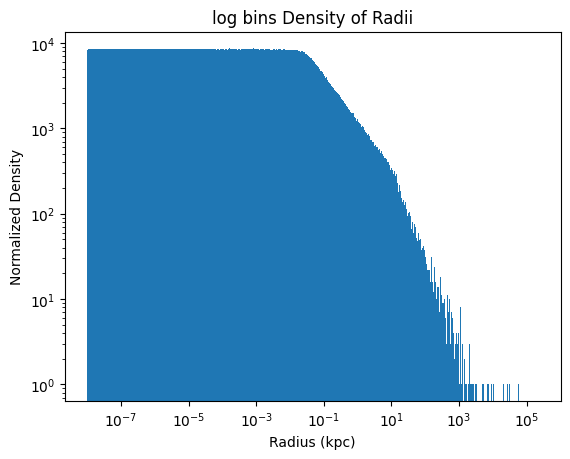

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import c

# Constants
G = 6.67430e-11  # Gravitational constant (m^3/kg/s^2)
M_sun = 4e6 * 1.989e30  # Mass of the Galactic centre (kg)
kpc = 30856778570831.268


def circular_orbit_velocity(r, M=M_sun):
    """Compute the circular orbital velocity at radius r."""
    return np.sqrt(G * M / (r * kpc))

def specific_energy(r, v, M=M_sun):
    """Compute specific orbital energy."""
    return (v**2) / 2 - (G * M) / (r* kpc)


def new_orbit_circular(r, delta_v, M=M_sun):
    """Compute new orbital parameters after velocity change in a circular orbit."""

    # Initial velocity for a circular orbit
    v_initial = circular_orbit_velocity(r, M)

    # Apply velocity perturbation (assuming purely tangential boost)
    v_new = v_initial + delta_v

    # Compute new orbital energy
    E_initial = specific_energy(r, v_initial, M)
    E_new = specific_energy(r, v_new, M)

    # Determine new semi-major axis
    if E_new < 0:
        r_new = abs(- (G * M) / (2 * E_new))

        r_new = abs(r_new)
        #print(f"New bound orbit with semi-major axis: {r_new:.2e} m")
        a_new = - (G * M) / (2 * E_new * 1.496e11)
        #print(f"New bound orbit with semi-major axis: {a_new:.2e} AU")
        deltaRadius = (r_new - r)
        #print(f"Change of radius: {deltaRadius:.2e} m")
    if E_new > 0:
        #a_new = r
        r_new = float('nan')#0.5e-3 *1.496e11  # or any other suitable default value
        a_new = float('nan')
        deltaRadius = float('nan')
        E_new = float('nan')
        # continue
        #print("Object has escaped into a hyperbolic trajectory.")

    # Energy change
    delta_E = E_new - E_initial
    #print(f"Change in specific energy: {delta_E:.2e} J/kg")

    return r_new, a_new, deltaRadius, E_new




radius_dist = []
rad_kpc = []
mu, sigma = 0.01705*c, 0.008733*c # mean and standard deviation

low = 0.00000001#2062.65
high = 26.8 #5527898853.95 #10000 ly
size = 3000000
print(np.log10(low), np.log10(high))
# distances_power = np.logspace(np.log10(low), np.log10(high), size)
# uniform_dist = np.random.uniform(low=low, high=high, size=size)
# distances_power = np.random.uniform(np.log10(low), np.log10(high), size)
distances_power = np.linspace(np.log10(low), np.log10(high), size)
# print(distances_power)
# max milky way radius 5527153635.24

#Resample distances using inverse transform sampling
# def resample_distances(distances, num_samples):
#     # Calculate the cumulative distribution function (CDF)
#     cdf = np.cumsum(distances) / np.sum(distances)

#     # Generate random numbers between 0 and 1
#     random_numbers = np.random.rand(num_samples)

#     # Use inverse transform sampling to get new distances
#     resampled_distances = np.interp(random_numbers, cdf, distances)

#     return resampled_distances

# # Get resampled distances
# numbers = resample_distances(distances, size)
# print("numbers", numbers)


#for _ in range(size):

for number in distances_power:
# for value in uniform_dist:
  # resampled_distances = resample_distances(distances, 1)  # Get 1 resampled distance
  # number = resampled_distances[0]  # Extract the resampled distance
  # # print(number)
  # number = np.random.choice(distances)

  r_earth = 10**number  #Radius of Sagitarrius B in m
  # r_earth =  30856778570831268 * value  #Radius of Sagitarrius B in m from kpc
# Compute new orbit for particle m
  # print(r_earth)
  delta_v_m  = np.random.normal(mu, sigma)


  r_new, a_new, delta_r, E_new = new_orbit_circular(r_earth, delta_v_m)
  r_new = abs(r_new)
  r_kpc_new = r_new

  if not np.isnan(r_new) and E_new < 0: #and (1e-7 <= r_new/kpc <= 1e7):
    # rad_kpc.append(np.log((np.sqrt(r_new**2)/30856778570831268)))
    # radius_dist.append(np.log(np.sqrt((r_new**2))))
    rad_kpc.append(np.sqrt(r_new**2)/kpc)
    radius_dist.append(np.sqrt(r_new**2))

  # Compute new orbit for particle n
  # for n in range(100000):
  #check conservation of E and beta of n
  delta_v_n  = -1*np.random.normal(mu, sigma)

  # theta = 0.0
  #for theta in np.linspace(0, np.pi/2, 1000):
    #delta_v = np.cos(theta) * delta_v
  #   delta_v = 0.12*c
  r_new, a_new, delta_r, delta_E = new_orbit_circular(r_earth, delta_v_n)
  r_new = abs(r_new)
  r_kpc_new = r_new
  # print(r_new)
  # print(r_kpc_new)
  # print(delta_v)
  #r_new = np.sqrt(r_new**2)
  if not np.isnan(r_new) and E_new < 0: #and (1e-7 <= r_new/kpc <= 1e7):
    # rad_kpc.append(np.log((np.sqrt(r_new**2)/30856778570831268)))
    # radius_dist.append(np.log(np.sqrt((r_new**2))))
    rad_kpc.append(np.sqrt(r_new**2)/kpc)
    radius_dist.append(np.sqrt(r_new**2))



import numpy as np

def logarithmic_bins(data, num_bins):
  """
  Generates logarithmic bins for a given dataset.

  Args:
    data: The input data array.
    num_bins: The desired number of bins.

  Returns:
    An array of bin edges.
  """
  # Convert data to a NumPy array to allow element-wise comparison
  data = np.array(data)

  # Calculate minimum and maximum values (excluding zeros and negative values)
  min_val = np.min(data[data > 0])
  max_val = np.max(data)

  # Generate logarithmic bins
  bins = np.logspace(np.log10(min_val), np.log10(max_val), num_bins + 1)

  return bins

bins = logarithmic_bins(rad_kpc, num_bins=1000)
hist, bins, patches = plt.hist(rad_kpc, bins=bins, log=True)
plt.xlabel('Radius (kpc)')
plt.ylabel('Normalized Density')
plt.title('log bins Density of Radii')
plt.xscale('log')
plt.yscale('log')
# plt.grid(True)
# plt.xlim(1e-4, 1e4)
# # plt.xlim(0.0005e5, 0.0015*1.6e5)
# plt.ylim(0, 20000)
# plt.show()
# Plot normalized density
# plt.bar(bins[:-1], normalized_density, width=bin_widths, align='edge')
# plt.xlabel('Radius')
# plt.ylabel('Normalized Density')
# plt.title('Normalized Distribution Density of Radii')
# plt.xlabel('Radius')
# plt.ylabel('Normalized Density')
# plt.title('Normalized Distribution Density of Radii')
# plt.xscale('log')
# plt.yscale('log')
# # plt.xlim(0, 0.00005*max(radius_dist))
# # # plt.xlim(0.0005e5, 0.0015*1.6e5)
# # plt.ylim(0, 20000)
# plt.show()

# hist2, bins2, patches2 = plt.hist(rad_kpc, bins='auto', density=True, log=True)  # Get histogram data
# # Calculate logarithmic bin widths
# # Plot normalized density

# hist2, bins2, patches2 = plt.hist(rad_kpc, bins='auto', density=True, log=True)  # Get histogram data
# # Calculate logarithmic bin widths
# bin_widths2 = np.diff(bins2)

# # Normalize histogram by logarithmic bin widths
# normalized_density2 = hist2 / bin_widths2
# # print(bins)

# # Plot normalized density
# plt.bar(bins2[:-1], normalized_density2, width=bin_widths2, align='edge')
# plt.xlabel('Radius (kpc)')
# plt.ylabel('Normalized Density')
# plt.title('Normalized Distribution Density of Radii')
# plt.xscale('log')
# plt.yscale('log')
# # plt.xlim(1e-4, 1e4)
# # # plt.xlim(0.0005e5, 0.0015*1.6e5)
# # plt.ylim(0, 20000)
# plt.show()
# plt.savefig('img2')

# plt.hist(rad_kpc, bins=50, log=True, edgecolor='black', alpha=0.7)  # Log binning
# plt.xlabel('Radius (kpc)')
# plt.ylabel('Normalized Density')
# plt.title('Normalized Distribution Density of Radii')
# plt.xscale('log')
# plt.yscale('log')
# # plt.xlim(1e-4, 1e4)
# # # plt.xlim(0.0005e5, 0.0015*1.6e5)
# # plt.ylim(0, 20000)
# plt.show()
# plt.savefig('img2')
# np.save('rad_kpc.npy', rad_kpc)



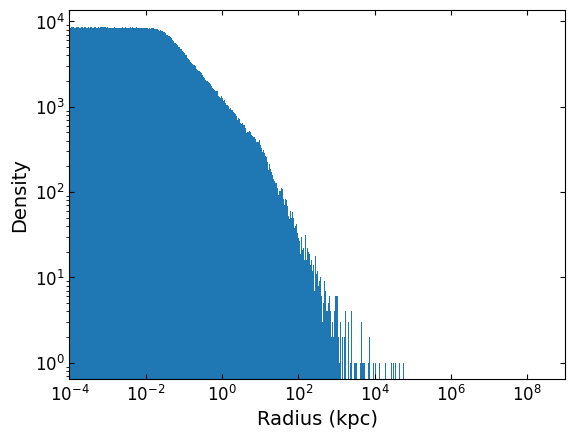

In [ ]:
hist, bins, patches = plt.hist(rad_kpc, bins=bins, log=True)

plt.rcParams['font.size'] = 12  # Adjust font size as needed
plt.tick_params(direction='in', top=True, right=True)  # Ticks inside the plot
plt.xlabel('Radius (kpc)', fontsize=14)  # Increase label font size
plt.ylabel('Density', fontsize=14)  # Increase label font size
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-4, 1e9)
plt.show()
# plt.savefig('final-nfw.pdf', bbox_inches='tight')

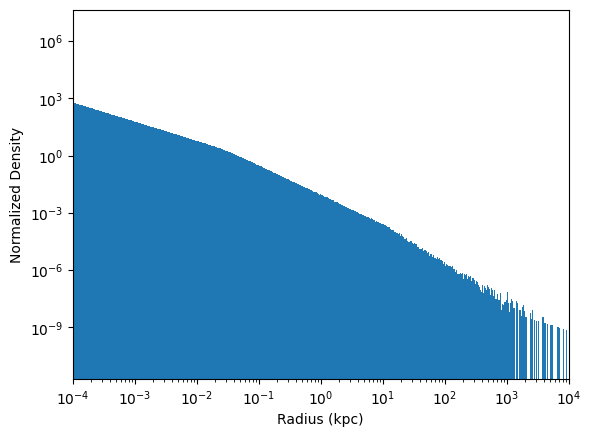

<Figure size 640x480 with 0 Axes>

In [ ]:

bins = logarithmic_bins(rad_kpc, num_bins=1000)
hist, bins, patches = plt.hist(rad_kpc, bins=bins, log=True, density=True)
plt.xlabel('Radius (kpc)')
plt.ylabel('Normalized Density')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-4, 1e4)
# # plt.xlim(0.0005e5, 0.0015*1.6e5)
# plt.ylim(0, 20000)
plt.show()
plt.savefig('static_img.pdf', bbox_inches='tight')

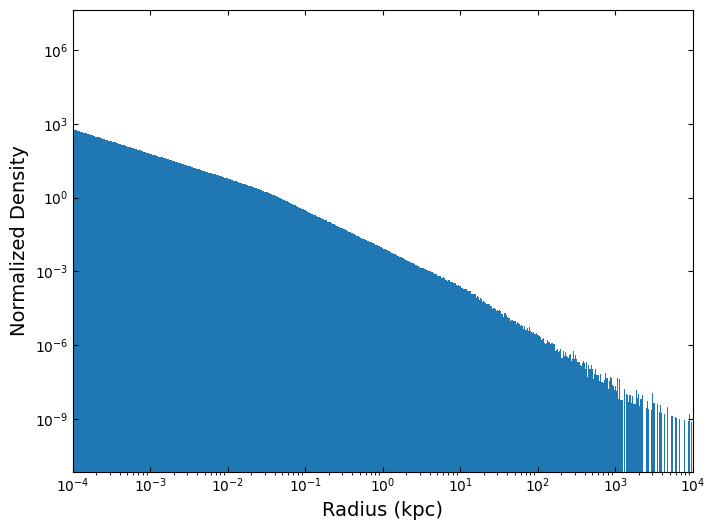

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.optimize import curve_fit
from scipy.constants import c
from collections import Counter
import sklearn as skl
from sklearn import preprocessing
import math
from scipy.stats import loguniform

# Assuming rad_kpc is your data
# ... (Your existing code to generate rad_kpc) ...

# def logarithmic_bins(data, num_bins):
#   """Create logarithmic bins for a histogram."""
#   min_val = np.min(data)
#   max_val = np.max(data)
#   return np.logspace(np.log10(min_val), np.log10(max_val), num_bins)

# # Create logarithmic bins
# bins = logarithmic_bins(rad_kpc, num_bins=1000)

# Create the histogram

# Set plot aesthetics for publication
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
# plt.rcParams['font.family'] = 'serif'  # Use a serif font (e.g., Times New Roman)
hist, bins, patches = plt.hist(rad_kpc, bins=bins, density=True)#, log=True)

plt.rcParams['font.size'] = 12  # Adjust font size as needed
plt.tick_params(direction='in', top=True, right=True)  # Ticks inside the plot
plt.xlabel('Radius (kpc)', fontsize=14)  # Increase label font size
plt.ylabel('Normalized Density', fontsize=14)  # Increase label font size
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-4, 1e4)

# Remove spines (optional)
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)

# Add gridlines (optional)
# plt.grid(True, linestyle='--', alpha=0.5)

# Save the figure
plt.savefig('distribution_plot.pdf', bbox_inches='tight')  # Save as PDF for high quality

# Show the plot
plt.show()

#Time Evolution of DM distribution

In [ ]:
from random import choices

rad_evolve_kpc = []
totaltime = 10
#Time evolution of initial system
for t in range(totaltime):
  t += 1
  #choosing new radii of interactiojn based on
  sample_radius = np.asarray(random.choices(bins[:-1], weights=hist, k=3000000))

  for value in sample_radius:

    r_earth = value  #Radius of Sagitarrius B in m
    # r_earth =  30856778570831268 * value  #Radius of Sagitarrius B in m from kpc
    # Compute new orbit for particle m
    # print(r_earth)
    delta_v_m  = np.random.normal(mu, sigma)


    r_new, a_new, delta_r, E_new = new_orbit_circular(r_earth, delta_v_m)
    r_new = abs(r_new)
    r_kpc_new = r_new

    if not np.isnan(r_new) and E_new < 0: #and (1e-7 <= r_new/kpc <= 1e7):
      # rad_kpc.append(np.log((np.sqrt(r_new**2)/30856778570831268)))
      # radius_dist.append(np.log(np.sqrt((r_new**2))))
      rad_evolve_kpc.append(np.sqrt(r_new**2)/kpc)
      # radius_dist.append(np.sqrt(r_new**2))

    # Compute new orbit for particle n
    delta_v_n  = -1*np.random.normal(mu, sigma)

    # theta = 0.0
    #for theta in np.linspace(0, np.pi/2, 1000):
      #delta_v = np.cos(theta) * delta_v
    #   delta_v = 0.12*c
    r_new, a_new, delta_r, delta_E = new_orbit_circular(r_earth, delta_v_n)
    r_new = abs(r_new)
    r_kpc_new = r_new
    # print(r_new)
    # print(r_kpc_new)
    # print(delta_v)
    #r_new = np.sqrt(r_new**2)
    if not np.isnan(r_new) and E_new < 0: #and (1e-7 <= r_new/kpc <= 1e7):
      # rad_kpc.append(np.log((np.sqrt(r_new**2)/30856778570831268)))
      # radius_dist.append(np.log(np.sqrt((r_new**2))))
      rad_evolve_kpc.append(np.sqrt(r_new**2)/kpc)
      # radius_dist.append(np.sqrt(r_new**2))

  bins_t = logarithmic_bins(rad_evolve_kpc, num_bins=1000)
  hist_t, bins, patches = plt.hist(rad_evolve_kpc, bins=bins, density=True, log=True)

plt.hist(rad_evolve_kpc, bins=bins_t, log=True, edgecolor='black', alpha=0.7)  # Log binning
plt.xlabel('Radius (kpc)')
plt.ylabel('Normalized Density t=1')
plt.title('log bins Density of Radii after time ' + str(t))
plt.xscale('log')
plt.yscale('log')
# plt.xlim(1e-4, 1e4)
# # plt.xlim(0.0005e5, 0.0015*1.6e5)
# plt.ylim(0, 100000)
plt.show()

In [ ]:
plt.hist(rad_evolve_kpc, bins=bins_t, log=True, edgecolor='blue', alpha=0.7)  # Log binning
plt.hist(rad_kpc, bins=bins, density=True, log=True)
plt.xlabel('Radius (kpc)')
plt.ylabel('Normalized Density ')
plt.title('log bins Density of Radii after time ' + str(t))
plt.xscale('log')
plt.yscale('log')
# plt.xlim(1e-4, 1e4)
# # plt.xlim(0.0005e5, 0.0015*1.6e5)
plt.ylim(0, 1000000)
plt.show()

#Reaction rate inclusion

In [ ]:
!pip install uproot pyroot

In [ ]:
import random
import time
import sys
import pandas as pd
from random import choices
import numpy as np
from tqdm.auto import tqdm
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
start_time = time.time()
from scipy.constants import c
import matplotlib.pyplot as plt

#Time evolution of initial system
rad_kpc = np.load('/content/drive/MyDrive/rad_kpc.npy')
# bins = logarithmic_bins(rad_kpc, num_bins=1000)
# hist, bins, patches = plt.hist(rad_kpc, bins=bins, density=True, log=True)
rad_evolve_kpc = []
array_list = []
bins_list = []
size = 3000000
totaltime = 1000
rho_0 = 2.5e17 #experimnetal nuclear density kg/m^3
M_hex = 4.243*10**-27 #hexaquark mass

def logarithmic_bins(data, num_bins):
  """
  Generates logarithmic bins for a given dataset.

  Args:
    data: The input data array.image
    num_bins: The desired number of bins.

  Returns:
    An array of bin edges.
  """
  # Convert data to a NumPy array to allow element-wise comparison
  data = np.array(data)

  # Calculate minimum and maximum values (excluding zeros and negative values)
  min_val = np.min(data[data > 0])
  max_val = np.max(data)

  # Generate logarithmic bins
  bins = np.logspace(np.log10(min_val), np.log10(max_val), num_bins + 1)

  return bins


#static initial case
rad_static_kpc = rad_kpc

#condensate parameters; number of hexaquarks and condensate density
##########################################################################
# a'_V  = 1 MeV : num = 10**3                                            #
#                 rho = 6 * rho_0                                        #
#                 mu, sigma = 0.01705*c, 0.008733*c                      #
#                 Cross-over to M-B dist at approx 10^5                  #
# a'_V  = 50 keV : num = 1.8*10**7                                       #
#                 rho = 6 * rho_0                                        #
#                 mu, sigma = 3.2e-4*c, 1.9e-4*c                         #
##########################################################################


num = 10**3
rho = 6 * rho_0
mu, sigma = 0.01705*c, 0.008733*c # mean and standard deviation
condensate_radius = (3*M_hex*num/(4*np.pi*rho))**(1.0/3)
print(condensate_radius, "condensate radius")
print(M_hex*num)
print(4*np.pi*10*condensate_radius**2/(M_hex*num) , "cross section/mass")

density_list = []
radius_list = []
time_list = []

for t in range(totaltime):
  t += 1
  time_list.append(t)
  #rate of interaction
  normalization_factor = 0.1  # Gyr^-1
  # rho_dm_norm = 0.1  # M_sun/pc^3
  # v_rel_norm = 50.0  # km/s

  sigma_per_m_norm = 1.0 # cm^2/g

  #Adjustable constants
  #rho_dm = hist  # M_sun/pc^3
  # v_rel = 50.0  # km/s
  sigma_per_m =  4*np.pi*condensate_radius**2/(M_hex*num)*10 # cm^2/g

  # Calculate the scattering rate
  rate = normalization_factor   * (sigma_per_m / sigma_per_m_norm) #* (rho_dm / rho_dm_norm)#(v_rel / v_rel_norm)
  sample = int(size * rate)

  rad_temp_kpc = []

  #choosing new radii of interactiojn based on
  sample_radius = np.asarray(random.choices(bins[:-1], weights=hist, k=sample))
  index = 0
  # initial_radii = sample_radius
  for i,value in enumerate((sample_radius)):
    # index += 1
    r_earth = value  #Radius of Sagitarrius B in m
    # r_earth =  30856778570831268 * value  #Radius of Sagitarrius B in m from kpc
    # Compute new orbit for particle m
    # print(r_earth)
    delta_v_m  = np.random.normal(mu, sigma)


    r_new, a_new, delta_r, E_new = new_orbit_circular(r_earth, delta_v_m)
    # r_new = abs(r_new)
    r_kpc_new = abs(r_new)

    if not np.isnan(r_new) and E_new < 0 and (1e-7 <= r_new/kpc <= 1e7):
      rad_temp_kpc.append(r_kpc_new)  # Replace old radius with new
      # rad_kpc.append(np.log((np.sqrt(r_new**2)/30856778570831268)))
      # radius_dist.append(np.log(np.sqrt((r_new**2))))
      # rad_evolve_kpc.append(np.sqrt(r_new**2)/kpc)
      # radius_dist.append(np.sqrt(r_new**2))

    # Compute new orbit for particle n
    delta_v_n  = -1*np.random.normal(mu, sigma)

    # theta = 0.0
    #for theta in np.linspace(0, np.pi/2, 1000):
      #delta_v = np.cos(theta) * delta_v
    #   delta_v = 0.12*c
    r_new, a_new, delta_r, delta_E = new_orbit_circular(r_earth, delta_v_n)
    r_new = abs(r_new)
    r_kpc_new = r_new
    # print(r_new)
    # print(r_kpc_new)
    # print(delta_v)
    #r_new = np.sqrt(r_new**2)
    if not np.isnan(r_new) and E_new < 0 and (1e-7 <= r_new/kpc <= 1e7):
      rad_temp_kpc.append(r_kpc_new)  # Replace old radius with new
      # rad_kpc.append(np.log((np.sqrt(r_new**2)/30856778570831268)))
      # radius_dist.append(np.log(np.sqrt((r_new**2))))
      # rad_evolve_kpc.append(np.sqrt(r_new**2)/kpc)
      # radius_dist.append(np.sqrt(r_new**2))


  # remove values selected with sample_radius and replace any new radii in rad_static with those in rad_static
  # rad_evolve_kpc = rad_temp_kpc + rad_static_kpc - sample_radius

  rad_static_kpc = np.setdiff1d(rad_static_kpc, sample_radius)
  rad_static_kpc = np.concatenate((rad_static_kpc, rad_temp_kpc))
  rad_evolve_kpc = rad_static_kpc

  radius_dist =  np.append(radius_dist, rad_evolve_kpc)
  density_list = np.append(density_list, hist)
  bins_list = np.append(bins_list, bins)

  bins_t = logarithmic_bins(rad_evolve_kpc, num_bins=1000)
  # bins_delta = logarithmic_bins(initial_radii, num_bins=1000)
  # hist_delta, bins, patches = plt.hist(initial_radii, bins=bins_delta, density=True, log=True)
  hist_t, bins, patches = plt.hist(rad_evolve_kpc, bins=bins_t, density=True, log=True)
  # current_array =  hist_t, bins, patches
  # array_list.append(current_array)
  size = rate  * size
    # rad_kpc = rad_temp_kpc

# bins = logarithmic_bins(rad_kpc, num_bins=1000)
rad_low_kpc = rad_evolve_kpc
np.save('/content/drive/MyDrive/rad_low_kpc.npy', rad_low_kpc)

num_frams = totaltime

hist, bins, patches = plt.hist(rad_evolve_kpc, bins=bins_t, density=True, log=True)
# for i in range(len(array_list)):
#   hist_t, bins, patches = array_list[i]  # Extract hist and bins from the tuple
#   plt.plot(bins[:-1], hist_t, label=f'Iteration {i+1}')  # Plot with label for lege)  # Plot bins vs. hist values
# plt.hist(rad_kpc, bins=bins, density=True, log=True)
rad_low_kpc = rad_evolve_kpc
plt.hist(rad_evolve_kpc, bins=bins_t, log=True, edgecolor='black', alpha=0.7)  # Log binning
plt.xlabel('Radius (kpc)')
plt.ylabel('Normalized Density ')
plt.title('log bins Density of Radii')
plt.xscale('log')
plt.yscale('log')
# plt.xlim(1e-4, 1e4)
# # plt.xlim(0.0005e5, 0.0015*1.6e5)
# plt.ylim(0, 20000)
plt.legend()
plt.show()

plt.plot(time_list, radius_list, density_list)
plt.xlabel('radius')
plt.ylabel('Density')
plt.zlabel('time')
plt.title('Density vs. Time')
plt.show()

# Create 3D time slice plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create meshgrid for radius and time
radius_mesh, time_mesh = np.meshgrid(bins_list[0][:-1], time_list)  # Assuming all bins are the same

# Plot the surface
ax.plot_surface(radius_mesh, time_mesh, np.array(density_list).T, cmap='viridis')

ax.set_xlabel('Radius (kpc)')
ax.set_ylabel('Time')
ax.set_zlabel('Density')
ax.set_title('Density vs. Radius vs. Time')

plt.show()

end_time = time.time()
elapsed_time = end_time - start_time


print(f"Task took: {elapsed_time:.2f} seconds")

8.773328436135966e-15 condensate radius
4.243e-24
0.0022796365308317013 cross section/mass


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7dfd1bdeaa20> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7dfd1bde8400> (for post_execute):


KeyboardInterrupt: 

4.072218330278616e-15 condensate radius
4.243e-25
0.004911328022687755 cross section cm^2/mass g


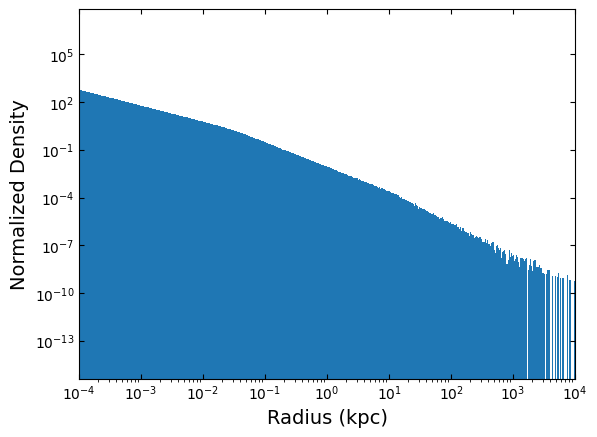

In [ ]:
import random
import time
import sys
import pandas as pd
from random import choices
import numpy as np
from tqdm.auto import tqdm
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
start_time = time.time()
from scipy.constants import c
import matplotlib.pyplot as plt
#Time evolution of initial system
rad_kpc = np.load('/content/drive/MyDrive/rad_kpc.npy')
# bins = logarithmic_bins(rad_kpc, num_bins=1000)
# hist, bins, patches = plt.hist(rad_kpc, bins=bins, density=True, log=True)
rad_kpc = rad_kpc
rad_evolve_kpc = []
array_list = []
bins_list = []
all_hist_data = []  # List to store all histogram data
size = 3000000
totaltime = 1000
rho_0 = 2.5e17 #experimnetal nuclear density kg/m^3
M_hex = 4.243*10**-27 #hexaquark mass


def logarithmic_bins(data, num_bins):
  """
  Generates logarithmic bins for a given dataset.

  Args:
    data: The input data array.image
    num_bins: The desired number of bins.

  Returns:
    An array of bin edges.
  """
  # Convert data to a NumPy array to allow element-wise comparison
  data = np.array(data)

  # Calculate minimum and maximum values (excluding zeros and negative values)
  min_val = np.min(data[data > 0])
  max_val = np.max(data)

  # Generate logarithmic bins
  bins = np.logspace(np.log10(min_val), np.log10(max_val), num_bins + 1)

  return bins


#static initial case
rad_static_kpc = rad_kpc

#condensate parameters; number of hexaquarks and condensate density
##########################################################################
# a'_V  = 1 MeV : num = 10**3                                            #
#                 rho = 6 * rho_0                                        #
#                 mu, sigma = 0.01705*c, 0.008733*c                      #
#                 Cross-over to M-B dist at approx 10^5                  #
# a'_V  = 10 keV : num = 1.8*10**6                                       #
#                 rho = 6 * rho_0                                        #
#                 mu, sigma = 3.2e-4*c, 1.9e-4*c                         #
##########################################################################


num = 10**2
rho = 6 * rho_0
mu, sigma = 0.01705*c, 0.008733*c # mean and standard deviation
condensate_radius = (3*M_hex*num/(4*np.pi*rho))**(1.0/3) # in m
print(condensate_radius, "condensate radius")
print(M_hex*num)
print(4*np.pi*(100*condensate_radius)**2/(M_hex*1000*num) , "cross section cm^2/mass g")

time_list = []
density_list = []
bins_list = []
radius_dist = []
# Store histogram data for each time step
histogram_data = []
# histogram_data = np.array(histogram_data)  # Shape: (totaltime, len(bins_t)-1)
for t in range(totaltime):
  t += 1
  time_list.append(t)
  #rate of interaction
  normalization_factor = 0.1  # Gyr^-1
  # rho_dm_norm = 0.1  # M_sun/pc^3
  # v_rel_norm = 50.0  # km/s

  sigma_per_m_norm = 1.0 # cm^2/g

  #Adjustable constants
  #rho_dm = hist  # M_sun/pc^3
  # v_rel = 50.0  # km/s
  sigma_per_m = 4*np.pi*(100*condensate_radius)**2/(M_hex*1000*num)  # cm^2/g

  # Calculate the scattering rate
  rate = normalization_factor   * (sigma_per_m / sigma_per_m_norm) #* (rho_dm / rho_dm_norm)#(v_rel / v_rel_norm)
  sample = int(size * rate)

  rad_temp_kpc = []

  #choosing new radii of interactiojn based on
  sample_radius = np.asarray(random.choices(bins[:-1], weights=hist, k=sample))
  index = 0
  # initial_radii = sample_radius
  for i,value in enumerate((sample_radius)):
    # index += 1
    r_earth = value  #Radius of Sagitarrius B in m

    delta_v_m  = np.random.normal(mu, sigma)


    r_new, a_new, delta_r, E_new = new_orbit_circular(r_earth, delta_v_m)
    # r_new = abs(r_new)
    r_kpc_new = abs(r_new)

    if not np.isnan(r_new) and E_new < 0 and (1e-7 <= r_new/kpc <= 1e7):
      rad_temp_kpc.append(r_kpc_new)  # Replace old radius with new

    # Compute new orbit for particle n
    delta_v_n  = -1*np.random.normal(mu, sigma)


    r_new, a_new, delta_r, delta_E = new_orbit_circular(r_earth, delta_v_n)
    r_new = abs(r_new)
    r_kpc_new = r_new

    if not np.isnan(r_new) and E_new < 0 and (1e-7 <= r_new/kpc <= 1e7):
      rad_temp_kpc.append(r_kpc_new)  # Replace old radius with new

  rad_static_kpc = np.setdiff1d(rad_static_kpc, sample_radius)
  rad_static_kpc = np.concatenate((rad_static_kpc, rad_temp_kpc))
  rad_evolve_kpc = rad_static_kpc
  # bins_t = np.logspace(-7, 7, num=100)

  # if len(rad_evolve_kpc) > 0:
  #     bins_t = np.logspace(-7, 7, num=100)
  # else:
  #     bins_t = np.array([])  # Or some default bins if the array is empty
  # # bins_t = logarithmic_bins(rad_evolve_kpc, num_bins=1000)

  # Store histogram data
  # hist_t, bins_t, _ = plt.hist(rad_evolve_kpc, bins=bins_t, density=True, log=True)
  # for radii_at_t in rad_evolve_kpc:
  bins_t = logarithmic_bins(rad_evolve_kpc, num_bins=1000)
  hist_t, bins_t, _ = plt.hist(rad_evolve_kpc, bins=bins_t, density=True, log=True)
  bins_t_center = np.sqrt(bins_t[:-1] * bins_t[1:])

  # Normalize density values
  # max_val = np.max(hist_t)
  # hist_t = hist_t / max_val if max_val > 0 else hist_t  # Normalize density values
  histogram_data.append((hist_t, rad_evolve_kpc.copy()))

  radius_dist.append(rad_evolve_kpc)  # Use extend for lists
  # radius_dist =  np.append(radius_dist, rad_evolve_kpc)

  # #Added check for empty bins
  # # if len(rad_evolve_kpc) > 0:
  # bins_t = logarithmic_bins(rad_evolve_kpc, num_bins=1000)
  # hist_t, _ = np.histogram(rad_evolve_kpc, bins=bins_t, density=True, log=True)
  # bins_list.append(bins_t) #Appending bins to preserve them after every iteration.
  # else:
  #   bins_t = np.array([])  # Or some default bins if the array is empty
  #   hist_t = np.array([])  # Handle empty bins or hist
  # # density_list.append(hist_t) #Appending density list to preserve them after every iteration.


  # density_list.extend(hist_t)
  # bins_list.extend(bins_t)
  # radius_dist.extend(rad_evolve_kpc)  # Use extend for lists
  # radius_dist =  np.append(radius_dist, rad_evolve_kpc)
  # density_list = np.append(hist)
  # bins_list = np.append(bins_list, bins)
  size = rate  * size
  radius_dist.append(rad_evolve_kpc.copy())
  # radius_dist_flat = [item for sublist in radius_dist for item in sublist if isinstance(item, (int, float))]
  # density_list.append(hist_t)  # Appending density list to preserve them after every iteration.
  # density_list_flat = [item for sublist in density_list for item in sublist if isinstance(item, (int, float))]
#   # density = np.array(density_list_flat)
#   # Compute 2D histogram
#   time_list = list(range(len(radius_dist)))
#   df = pd.DataFrame({'dataset_id': i, 'bins': bins_t[:-1], 'frequency': hist})

#     # Append to the list
#   all_hist_data.append(df)

# # Concatenate all DataFrames
# all_hist_df = pd.concat(all_hist_data, ignore_index=True)

# # Save to CSV
# all_hist_df.to_csv('all_histogram_data.csv', index=False)
  # radius = [value for value in radius if not np.isnan(value)]
  # time_list = [value for value in time_list if not np.isnan(value)]
#   hist, xedges, yedges = np.histogram2d(radius_dist, time_list, bins=(100, 100), density=True)
  # histogram_data = np.array(histogram_data)  # Shape: (totaltime, len(bins_t)-1)
#   # Prepare bar positions
#   xpos, ypos = np.meshgrid(xedges[:-1] + xedges[1:], yedges[:-1] + yedges[1:])
#   xpos = xpos.flatten() / 2.0
#   ypos = ypos.flatten() / 2.0
#   zpos = np.zeros_like(xpos)

#   # Bar dimensions
#   dx = xedges[1] - xedges[0]
#   dy = yedges[1] - yedges[0]
#   dz = hist.flatten()
#   cmap = cm.get_cmap('viridis')  # Colormap
#   max_height = np.max(dz)        # Normalize color range
#   min_height = np.min(dz)
#   rgba = [cmap((k - min_height) / max_height) if max_height > min_height else cmap(0) for k in dz]

#   # Plot bars for this time step
#   ax.bar3d(xpos, ypos + t * dy * 2.5, zpos, dx, dy, dz, color=rgba, zsort='average')
rad_low_kpc = rad_evolve_kpc
np.save('/content/drive/MyDrive/rad_low_kpc.npy', rad_low_kpc)


hist, bins, patches = plt.hist(rad_low_kpc, bins=bins_t, density=True)#, log=True)

plt.rcParams['font.size'] = 12  # Adjust font size as needed
plt.tick_params(direction='in', top=True, right=True)  # Ticks inside the plot
plt.xlabel('Radius (kpc)', fontsize=14)  # Increase label font size
plt.ylabel('Density', fontsize=14)  # Increase label font size
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-4, 1e4)

plt.savefig('time_plot.pdf', bbox_inches='tight')  # Save as PDF for high quality


# Remove spines (optional)
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)

# Add gridlines (optional)
# plt.grid(True, linestyle='--', alpha=0.5)

# Save the figure

# Show the plot
plt.show()
# # Set axis labels and title
# ax.set_xlabel('Radius (kpc)')
# ax.set_ylabel('Time Step')
# ax.set_zlabel('Density')
# ax.set_title('3D Histogram of Density vs. Radius Over Time')

# plt.tight_layout()
# plt.show()
# 1. Handle nan values (replace with a default value here, for in# 1. Convert to NumPy arrays
# radius = np.asarray(radius)
# time_list = np.asarray(time_list)


# # Create a figure and an axes object
# fig, ax = plt.subplots()

# # Iterate through the time slices
# for i, hist_t in enumerate(histogram_data):
#     # Unpack the histogram data
#     hist_t, bins_t = hist_t
#     # Create histogram for the current time slice
#     hist_t, bins_t, _ = ax.hist(
#         hist_t, bins=100,  # Adjust bin number as needed
#         alpha=0.5,  # Adjust transparency for overlay
#         label=f"Time {i + 1}",  # Label for legend
#     )

# # Customize the plot
# ax.set_xlabel("Value")
# ax.set_ylabel("Frequency")
# ax.set_title("Histograms for Each Time Slice")
# ax.legend()

# # Display the plot
# plt.show()
# plt.savefig('histograms.png')

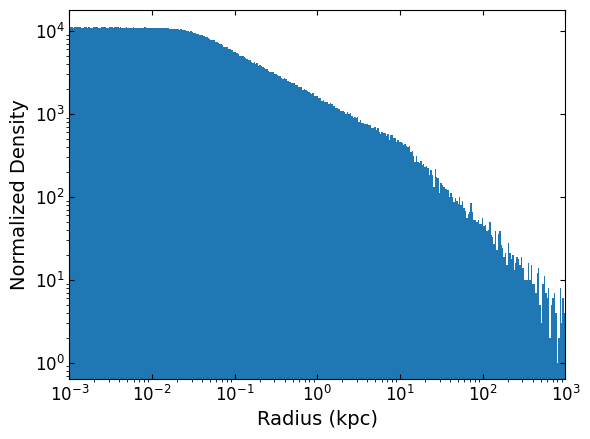

In [ ]:
np.load('/content/drive/MyDrive/rad_low_kpc.npy')
hist, bins, patches = plt.hist(rad_low_kpc, bins=bins_t)#, density=True)#, log=True)

plt.rcParams['font.size'] = 12  # Adjust font size as needed
plt.tick_params(direction='in', top=True, right=True)  # Ticks inside the plot
plt.xlabel('Radius (kpc)', fontsize=14)  # Increase label font size
plt.ylabel('Normalized Density', fontsize=14)  # Increase label font size
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-3, 1e3)
# plt.ylim(1e-12,1e8)

plt.savefig('time_plot_narrow_unorm.pdf', bbox_inches='tight')  # Save as PDF for high quality


# Remove spines (optional)
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)

# Add gridlines (optional)
# plt.grid(True, linestyle='--', alpha=0.5)

# Save the figure

# Show the plot
plt.show()

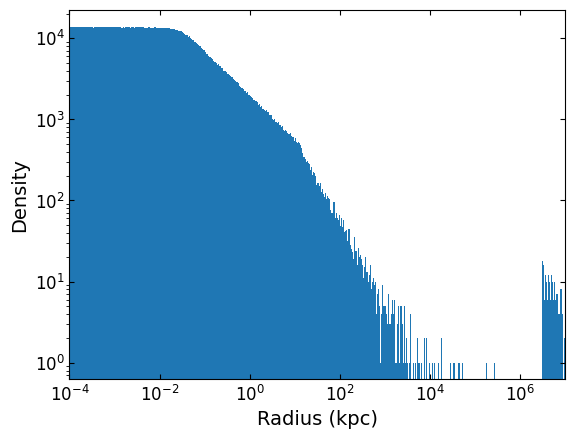

In [ ]:
np.load('/content/drive/MyDrive/rad_low_kpc.npy')
hist, bins, patches = plt.hist(rad_low_kpc, bins=bins_t)#, log=True)

plt.rcParams['font.size'] = 12  # Adjust font size as needed
plt.tick_params(direction='in', top=True, right=True)  # Ticks inside the plot
plt.xlabel('Radius (kpc)', fontsize=14)  # Increase label font size
plt.ylabel('Density', fontsize=14)  # Increase label font size
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-4, 1e7)

plt.savefig('time_plot_wide_unorm.pdf', bbox_inches='tight')  # Save as PDF for high quality


plt.show()

In [ ]:
!apt-get install root-system-bin libroot-math-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Package root-system-bin is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

E: Package 'root-system-bin' has no installation candidate
E: Unable to locate package libroot-math-dev


In [ ]:
import ROOT
import numpy as np

# Assuming you have your data in these arrays:
# density_values: 2D array (time steps x bins)
# radius_bins: array of radius bin edges
# time_bins: array of time bin edges


# Create a ROOT TH2D histogram
num_radius_bins = len(radius_bins) - 1
num_time_bins = len(time_bins) - 1
hist = ROOT.TH2D("density_vs_radius_time", "Density vs. Radius and Time",
                 num_radius_bins, radius_bins,
                 num_time_bins, time_bins)


# Fill the histogram with data
for i in range(num_time_bins):
    for j in range(num_radius_bins):
        density = density_values[i, j]
        radius = radius_bins[j] + (radius_bins[j + 1] - radius_bins[j]) / 2.0  # Center of the bin
        time = time_bins[i] + (time_bins[i + 1] - time_bins[i]) / 2.0  # Center of the bin
        hist.Fill(radius, time, density)

# Draw the histogram
canvas = ROOT.TCanvas("canvas", "Density vs. Radius and Time", 800, 600)
hist.Draw("COLZ")  # Use "COLZ" for a color-filled plot
canvas.Update()
canvas.SaveAs("density_vs_radius_time.png")

ModuleNotFoundError: No module named 'ROOT'

<ipython-input-12-e0f61c8a5619>:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


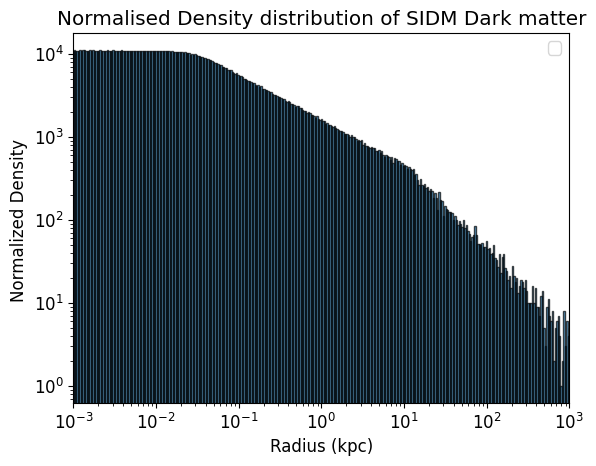

In [ ]:

plt.hist(rad_evolve_kpc, bins=bins_t, log=True, edgecolor='black', alpha=0.7)  # Log binning
plt.xlabel('Radius (kpc)')
plt.ylabel('Normalized Density ')
# plt.title('Normalised Density distribution of SIDM Dark matter')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-3, 1e3)
# # plt.xlim(0.0005e5, 0.0015*1.6e5)
# plt.ylim(0, 20000)
plt.legend()
plt.show()

<ipython-input-5-3476b3fa5dfb>:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


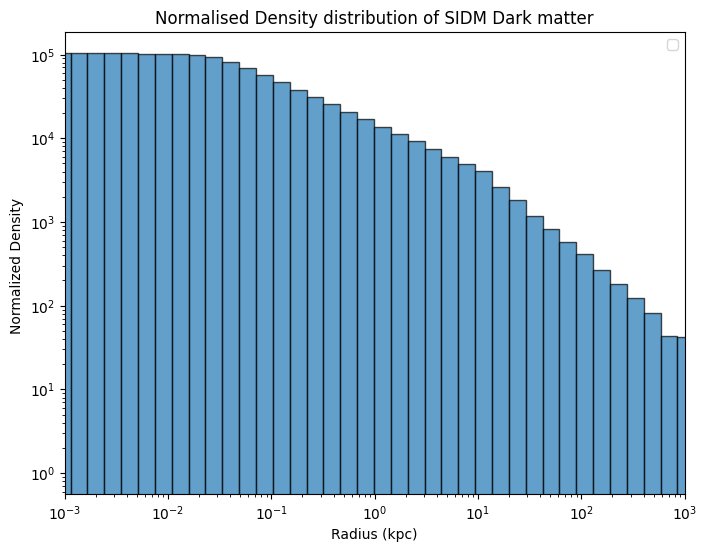

<ipython-input-5-3476b3fa5dfb>:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


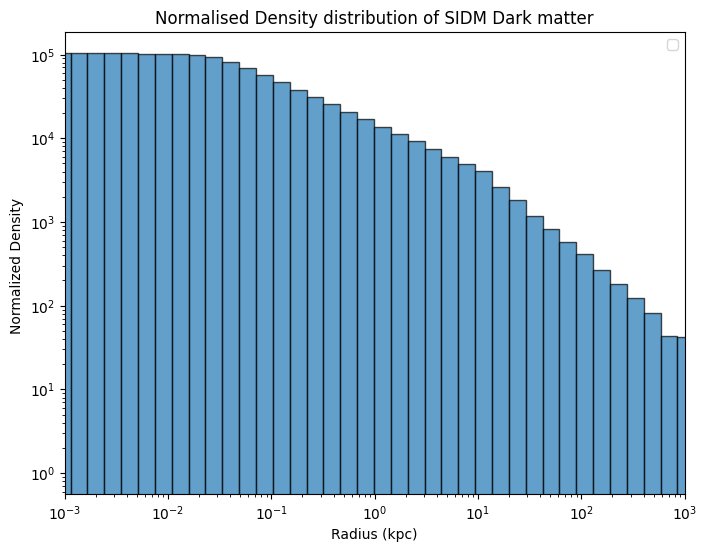

In [ ]:
# --- First Slice ---

# ... (in your plotting section) ...

first_hist_t, first_rad_evolve_kpc = histogram_data[0]  # Unpacking the tuple
last_hist_t, last_rad_evolve_kpc = histogram_data[-1]  # Unpacking the tuple

# ... (use first_hist_t, first_rad_evolve_kpc for the first slice and last_hist_t, last_rad_evolve_kpc for the last slice in your plotting code) ...


fig1 = plt.figure(figsize=(8, 6))
ax1 = fig1.add_subplot(111)

# Use first_rad_evolve_kpc for the histogram data
ax1.hist(first_rad_evolve_kpc, bins=bins_t, log=True, edgecolor='black', alpha=0.7)

plt.xlabel('Radius (kpc)')
plt.ylabel('Normalized Density ')
plt.title('Normalised Density distribution of SIDM Dark matter')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-3, 1e3)
plt.legend()
plt.show()
# ... (rest of the plotting code for the first slice) ...

# --- Last Slice ---
fig2 = plt.figure(figsize=(8, 6))
ax2 = fig2.add_subplot(111)

# Use last_rad_evolve_kpc for the histogram data
ax2.hist(last_rad_evolve_kpc, bins=bins_t, log=True, edgecolor='black', alpha=0.7)

plt.xlabel('Radius (kpc)')
plt.ylabel('Normalized Density ')
plt.title('Normalised Density distribution of SIDM Dark matter')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-3, 1e3)
plt.legend()
plt.show()
# ... (rest of the plotting code for the last slice) ...

In [ ]:
t_values = np.arange(t)  # Create an array of time values from 0 to t-1
# Convert to NumPy array for easier manipulation
hist_interp_data = np.array(histogram_data)

# --- 3D PLOTTING ---
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# # Plot Histogram Evolution Over Time
# for t in range(totaltime):
#     xpos = bins_t[:-1]  # X-axis: Radius bins
#     ypos = np.full_like(xpos, t, dtype=float)  # Y-axis: Time step
#     zpos = np.zeros_like(xpos)  # Z-axis starts at 0
#     dx = np.diff(bins_t)  # Bin widths (log-spaced)
#     dy = np.full_like(xpos, 1)  # Constant bar width in y direction
#     dz = hist_interp_data[t]  # Normalized density values

#     ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average', color=plt.cm.viridis(t / totaltime))

# Convert list of histograms into a 2D NumPy array:
# Shape: (totaltime, num_bins-1)
hist_interp_data = np.array(histogram_data)

# --- Construct Meshgrid for Surface Plot ---
#   R: radius (X-axis), shape -> (totaltime, num_bins-1)
#   T: time   (Y-axis), shape -> (totaltime, num_bins-1)
R, T = np.meshgrid(rad_evolve_kpc[:-1], np.arange(totaltime))

# Z-axis = density values
Z = hist_interp_data  # shape -> (totaltime, num_bins-1)

# --- 3D Surface Plot ---
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(
    R, T, Z,
    cmap='viridis',
    edgecolor='none'
)

# Set the radius axis to log scale
# ax.set_xscale('log')
# ax.set_xlim(1e-3, 1e3)

ax.set_xlabel('Radius (kpc) [Log Scale]', labelpad=10)
ax.set_ylabel('Time Step', labelpad=10)
ax.set_zlabel('Density', labelpad=10)
ax.set_title('3D Time Evolution of Dark Matter Density', pad=20)

# Optionally add a color bar
fig.colorbar(surf, ax=ax, shrink=0.6, aspect=10, label='Normalized Density')

plt.tight_layout()
plt.show()

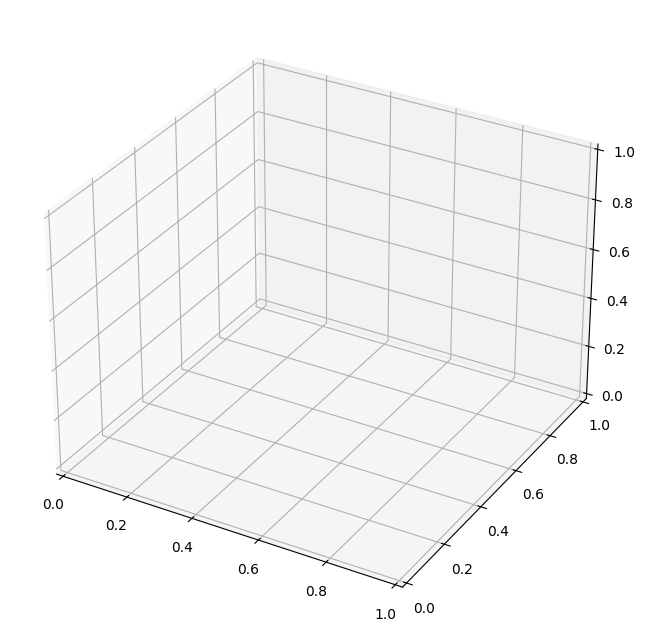

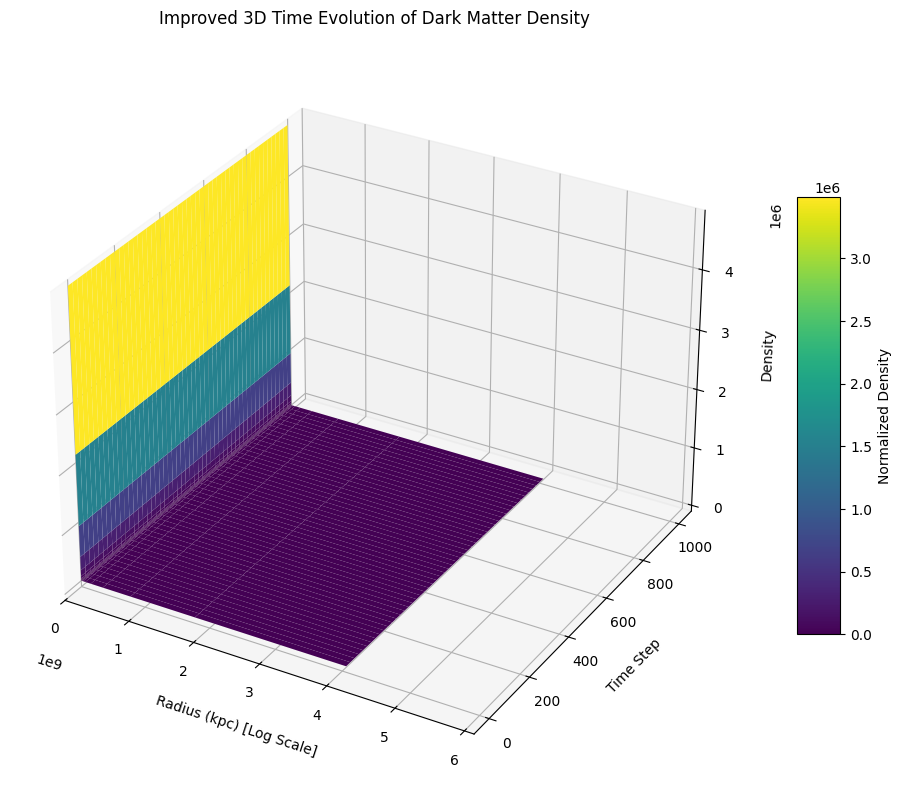

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Example data (replace with your actual data)
# totaltime = 100  # Number of time steps
# num_bins = 50    # Number of radius bins
# bins_t = np.logspace(-3, 3, num_bins)  # Log-spaced radius bins (kpc)
# histogram_data = np.random.rand(totaltime, num_bins - 1)  # Simulated density data
# --- Improved 3D Surface Plot ---
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Determine a fixed number of bins for all time steps
num_bins = 100  # Or any other suitable number
bins_fixed = np.logspace(np.log10(min(radius_dist)), np.log10(max(radius_dist)), num=num_bins)

# Create empty array to store density values for all time steps
density_data = np.zeros((totaltime, num_bins - 1))

# Fill the density_data array using the histogram data from each time step
for i in range(totaltime):
    hist_i, _ = np.histogram(histogram_data[i][1], bins=bins_fixed, density=True)  # Use the stored radii data
    density_data[i] = hist_i

# --- Construct Meshgrid for Surface Plot ---
R, T = np.meshgrid(bins_fixed[:-1], np.arange(totaltime))  # Radius and Time meshgrid
Z = density_data  # Density values

# --- Improved 3D Surface Plot ---
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(
    R, T, Z,
    cmap='viridis',
    edgecolor='none'
)

# Set log scale for radius axis
# ax.set_xscale('log')
ax.set_xlim(bins_t[0], bins_t[-1])

# Axis labels and title
ax.set_xlabel('Radius (kpc) [Log Scale]', labelpad=10)
ax.set_ylabel('Time Step', labelpad=10)
ax.set_zlabel('Density', labelpad=10)
ax.set_title('Improved 3D Time Evolution of Dark Matter Density', pad=20)

# Add a color bar for normalized density values
fig.colorbar(surf, ax=ax, shrink=0.6, aspect=10, label='Normalized Density')

plt.tight_layout()
plt.show()

# # --- 3D Plot without Color Scales ---
# fig = plt.figure(figsize=(12, 8))
# ax = fig.add_subplot(111, projection='3d')


# bins_fixed = np.linspace(bins_t[0], bins_t[-1], num=100)

# # Plot the data points as a scatter plot
# for i in range(totaltime):
#     hist_i, _ = np.histogram(rad_evolve_kpc, bins=bins_fixed, density=True)
#     ax.scatter(bins_t[:-1], [i] * len(bins_t[:-1]), histogram_data[i],
#                marker='o', s=2, color='black', alpha=0.5)

# Set log scale for radius axis
# ax.set_xscale('log')
ax.set_xlim(bins_fixed[0], bins_fixed[-1])  # Use bins_fixed for x-axis limits
# Axis labels and title
ax.set_xlabel('Radius (kpc) [Log Scale]', labelpad=10)
ax.set_ylabel('Time Step', labelpad=10)
ax.set_zlabel('Normalized Density', labelpad=10)
ax.set_title('3D Time Evolution of Dark Matter Density (No Color Scales)', pad=20)

plt.tight_layout()



plt.show()

In [ ]:
# Generate example data
volume_data = [density_list, radius_dist, time_list]

# Find the maximum length among the lists
max_len = max(len(density_list), len(radius_dist), len(time_list))

# Pad the lists to have the same length
density_list_padded = np.pad(density_list, (0, max_len - len(density_list)), 'constant', constant_values=np.nan)
radius_dist_padded = np.pad(radius_dist, (0, max_len - len(radius_dist)), 'constant', constant_values=np.nan)
time_list_padded = np.pad(time_list, (0, max_len - len(time_list)), 'constant', constant_values=np.nan)


# Convert the padded lists to a NumPy array
volume_data = np.array([density_list_padded, radius_dist_padded, time_list_padded])

# Plot slices along the third dimension (time_list)
fig, axes = plt.subplots(1, num_slices, figsize=(15, 5))

for i, ax in enumerate(axes):
    # Assuming your data is structured as [density, radius, time]
    # Adjust the indexing to access the appropriate data for the slice
    slice_data = volume_data[:, :, slice_indices[i]]
    ax.imshow(slice_data, cmap='viridis')
    ax.set_title(f"Slice {slice_indices[i]}")

plt.tight_layout()
plt.show()


In [ ]:
# Create meshgrid
X, Y = np.meshgrid(radial_bins, time_steps)

# Plot the surface
plt.pcolormesh(X, Y, density_data, shading='gouraud')  # or 'flat'

plt.xlabel('Radius')
plt.ylabel('Time')
plt.title('Evolution of Radial Density Profiles')
plt.colorbar(label='Density')

plt.show()

Use code with caution

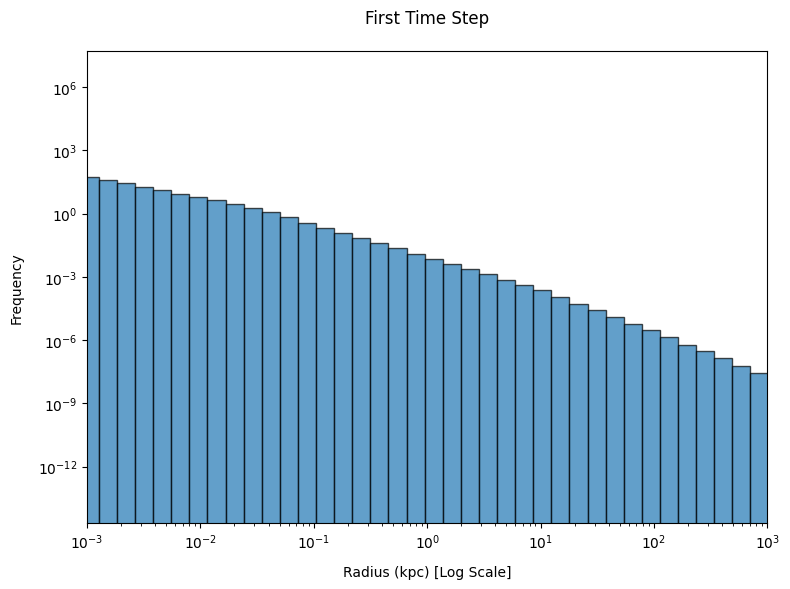

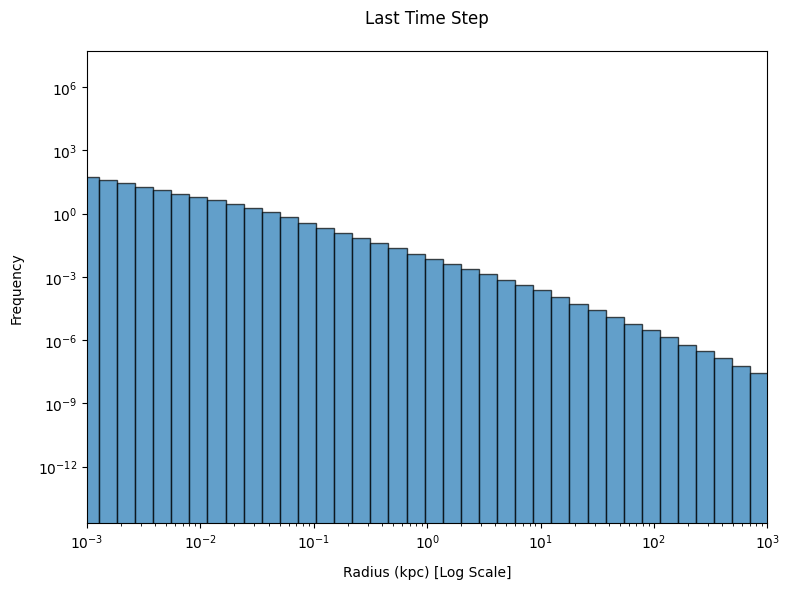

In [ ]:
import random
import time
import sys
from random import choices
import numpy as np
from tqdm.auto import tqdm
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
start_time = time.time()
from scipy.constants import c
import matplotlib.pyplot as plt

# ... (rest of your code) ...

# --- Plot First and Last Slices (Histogram Style) ---

# Get the first and last slices from histogram_data
first_slice = histogram_data[0]
last_slice = histogram_data[-1]

# --- First Slice ---
fig1 = plt.figure(figsize=(8, 6))
ax1 = fig1.add_subplot(111)

# Plot the histogram using bar plot for better representation
ax1.bar(bins_t[:-1], first_slice, width=np.diff(bins_t),
        edgecolor='black', alpha=0.7, align='edge')

# Set log scale for x-axis
ax1.set_xscale('log')
ax1.set_yscale('log')  # Set log scale for y-axis

# Axis labels and title
ax1.set_xlabel('Radius (kpc) [Log Scale]', labelpad=10)
ax1.set_ylabel('Frequency', labelpad=10)
ax1.set_title('First Time Step', pad=20)
plt.xlim(1e-3,1e3)
plt.tight_layout()
plt.show()

# --- Last Slice ---
fig2 = plt.figure(figsize=(8, 6))
ax2 = fig2.add_subplot(111)

# Plot the histogram using bar plot for better representation
ax2.bar(bins_t[:-1], last_slice, width=np.diff(bins_t),
        edgecolor='black', alpha=0.7, align='edge')

# Set log scale for x-axis
ax2.set_xscale('log')
ax2.set_yscale('log')  # Set log scale for y-axis

# Axis labels and title
ax2.set_xlabel('Radius (kpc) [Log Scale]', labelpad=10)
ax2.set_ylabel('Frequency', labelpad=10)
ax2.set_title('Last Time Step', pad=20)
plt.xlim(1e-3,1e3)
plt.tight_layout()
plt.show()

<ipython-input-9-8ad5882b8c35>:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


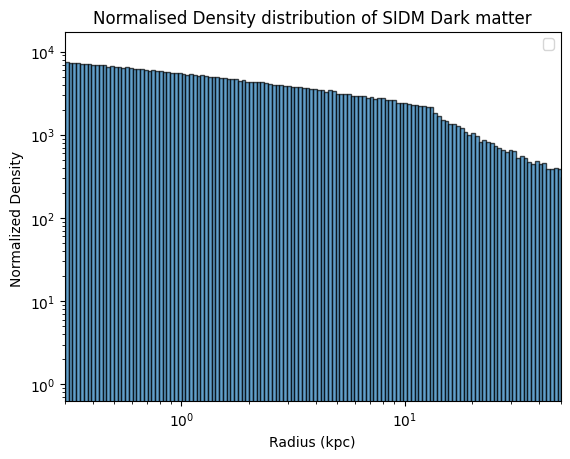

In [ ]:
plt.hist(rad_evolve_kpc, bins=bins_t, log=True, edgecolor='black', alpha=0.7)  # Log binning
plt.xlabel('Radius (kpc)')
plt.ylabel('Normalized Density ')
plt.title('Normalised Density distribution of SIDM Dark matter')
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.3, 50)
# # plt.xlim(0.0005e5, 0.0015*1.6e5)
# plt.ylim(0, 20000)
plt.legend()
plt.show()


<ipython-input-11-e222ed97927b>:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


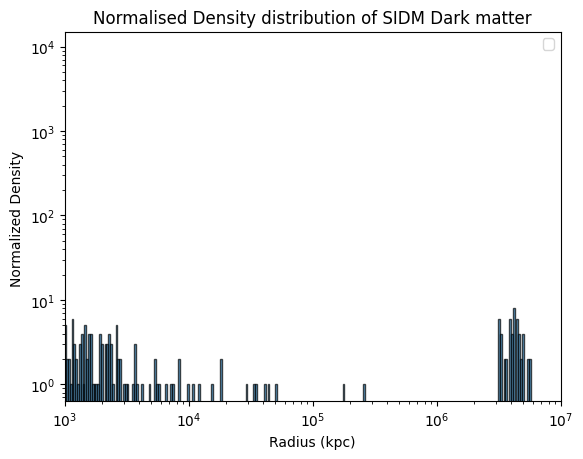

In [ ]:
plt.hist(rad_low_kpc, bins=bins_t, log=True, edgecolor='black', alpha=0.7)  # Log binning
plt.xlabel('Radius (kpc)')
plt.ylabel('Normalized Density ')
plt.title('Normalised Density distribution of SIDM Dark matter')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e3, 1e7)
# # plt.xlim(0.0005e5, 0.0015*1.6e5)
# plt.ylim(0, 20000)
plt.legend()
plt.show()


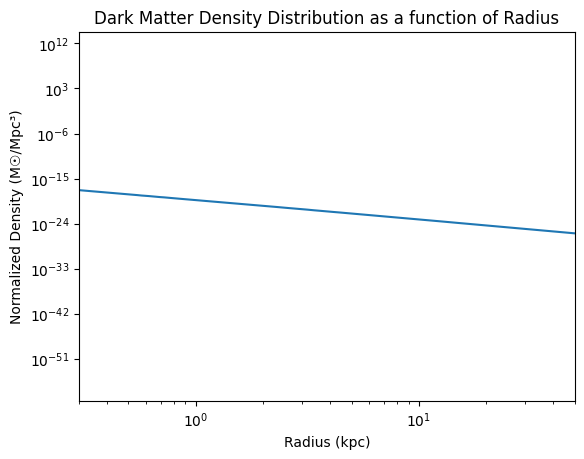

In [ ]:
bins = logarithmic_bins(rad_evolve_kpc, num_bins=1000)
# hist, bins, patches = plt.hist(rad_kpc, bins=bins, density=True, log=True)
#Calculate the bin centers
bin_centers = (bins[:-1] + bins[1:]) / 2
# Calculate the density for each bin
density = hist * 1e10 *1e9* 2.38/(c**2) / (1e30*(4 * np.pi * (bin_centers * 1e-3)**3))
plt.xlabel('Radius (kpc)')
plt.ylabel('Normalized Density (M☉/Mpc³)')
plt.title('Dark Matter Density Distribution as a function of Radius')
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.3, 50)
# # plt.xlim(0.0005e5, 0.0015*1.6e5)
# plt.ylim(0, 20000)
plt.plot(bin_centers, density) # Plot the density against bin centers
# plt.legend()
plt.show()

#Maxwell-Boltzmann Distribution for velocity

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.constants as const
from tqdm.auto import tqdm
c = const.c
lower_bound = 0.00001*c
upper_bound = 0.001*c
v_p = 0.0002*c
a = v_p/np.sqrt(2)
print(a)

42397.05600007665


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

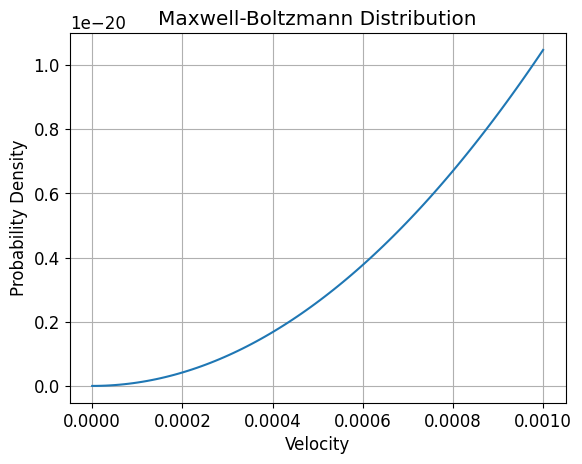

In [ ]:
x = np.linspace(0, 0.001, 100)  # Velocities from 0 to 0.002
pdf = stats.maxwell.pdf(x, scale=a)
plt.plot(x, pdf)
plt.xlabel('Velocity')
plt.ylabel('Probability Density')
plt.title('Maxwell-Boltzmann Distribution')
plt.grid(True)
plt.show()

2.299262499757152e-13 condensate radius
7.6374e-20
8.698441348959717e-05 cross section/mass


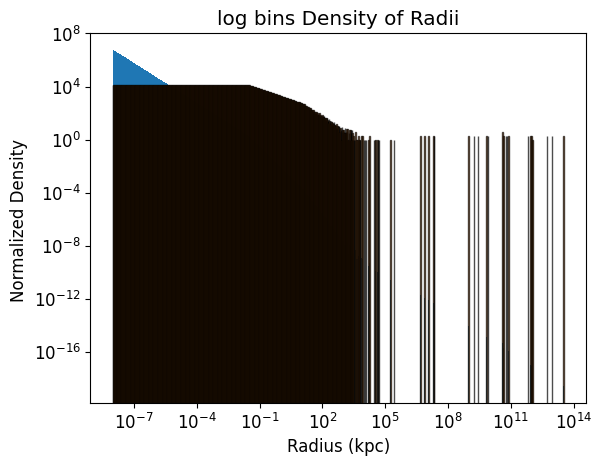

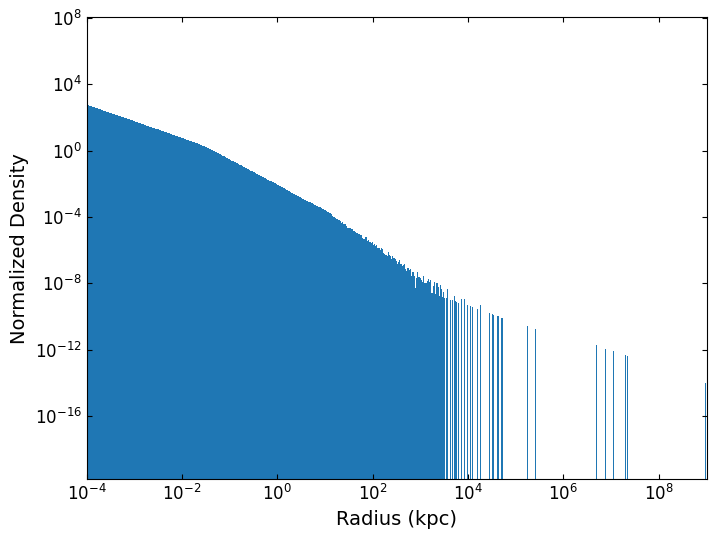

Task took: 1354.14 seconds


In [ ]:
import random
import time
import sys
import scipy.stats as stats
from random import choices
import numpy as np
from tqdm.auto import tqdm
import scipy.constants as const
c = const.c

start_time = time.time()
#Time evolution of initial system
rad_evolve_kpc = []
array_list = []
size = 3000000
totaltime = 1000
rho_0 = 2.5e17 #experimnetal nuclear density kg/m^3
M_hex = 4.243*10**-27 #hexaquark mass

v_p = 0.0002*c
a = v_p/np.sqrt(2)

rad_kpc = np.load('/content/drive/MyDrive/rad_kpc.npy')

def logarithmic_bins(data, num_bins):
  """
  Generates logarithmic bins for a given dataset.

  Args:
    data: The input data array.image
    num_bins: The desired number of bins.

  Returns:
    An array of bin edges.
  """
  # Convert data to a NumPy array to allow element-wise comparison
  data = np.array(data)

  # Calculate minimum and maximum values (excluding zeros and negative values)
  min_val = np.min(data[data > 0])
  max_val = np.max(data)

  # Generate logarithmic bins
  bins = np.logspace(np.log10(min_val), np.log10(max_val), num_bins + 1)

  return bins


#static initial case
rad_static_kpc = rad_kpc

#condensate parameters; number of hexaquarks and condensate density
##########################################################################
# a'_V  = 1 MeV : num = 10**3
#                 rho = 6 * rho_0
#                 mu, sigma = 0.01705*c, 0.008733*c
##a'_V  = 1 MeV : num = 1.8*10**7
#                 rho = 6 * rho_0
#                 mu, sigma = 3.2e-4*c, 1.9e-4*c for a bad gaussian
#


num = 1.8e7
rho = 6 * rho_0

# lower_bound = 0.00001
# upper_bound = 0.001
# v_p = 0.0002
# a = v_p/np.sqrt(2)
maxwell_dist = stats.maxwell(scale = a)

condensate_radius = (3*M_hex*num/(4*np.pi*rho))**(1.0/3)
print(condensate_radius, "condensate radius")
print(M_hex*num)
print(4*np.pi*(100*condensate_radius)**2/(M_hex*1000*num)  , "cross section/mass")

for t in range(totaltime):
  t += 1

  #rate of interaction
  normalization_factor = 0.1  # Gyr^-1
  # rho_dm_norm = 0.1  # M_sun/pc^3
  # v_rel_norm = 50.0  # km/s

  sigma_per_m_norm = 1.0 # cm^2/g

  #Adjustable constants
  #rho_dm = hist  # M_sun/pc^3
  # v_rel = 50.0  # km/s
  sigma_per_m = 4*np.pi*(100*condensate_radius)**2/(M_hex*1000*num)  # cm^2/g

  # Calculate the scattering rate
  rate = normalization_factor   * (sigma_per_m / sigma_per_m_norm) #* (rho_dm / rho_dm_norm)#(v_rel / v_rel_norm)
  sample = int(size * rate)

  rad_temp_kpc = []

  #choosing new radii of interactiojn based on
  sample_radius = np.asarray(random.choices(bins[:-1], weights=hist, k=sample))
  index = 0
  delta_v_m_array  = maxwell_dist.rvs(size=int(size))#np.random.normal(mu, sigma)
  delta_v_n_array  = -1*maxwell_dist.rvs(size=int(size))#np.random.normal(mu, sigma)


  # initial_radii = sample_radius
  for i,value in enumerate((sample_radius)):
    # index += 1
    r_earth = value  #Radius of Sagitarrius B in m
    # r_earth =  30856778570831268 * value  #Radius of Sagitarrius B in m from kpc
    # Compute new orbit for particle m
    # print(r_earth)
    delta_v_m = delta_v_m_array[i]
    # delta_v_m  = np.random.normal(mu, sigma)
    # for delta_v_m in delta_v_m_array:


    r_new, a_new, delta_r, E_new = new_orbit_circular(r_earth, delta_v_m)
    # r_new = abs(r_new)
    r_kpc_new = abs(r_new)

    if not np.isnan(r_new) and E_new < 0 and (1e-7 <= r_new/kpc <= 1e7):
      rad_temp_kpc.append(r_kpc_new)  # Replace old radius with new
      # rad_kpc.append(np.log((np.sqrt(r_new**2)/30856778570831268)))
      # radius_dist.append(np.log(np.sqrt((r_new**2))))
      # rad_evolve_kpc.append(np.sqrt(r_new**2)/kpc)
      # radius_dist.append(np.sqrt(r_new**2))

    # Compute new orbit for particle n
    delta_v_n = delta_v_n_array[i]


    # for delta_v_n in delta_v_n_array:
      # theta = 0.0
      #for theta in np.linspace(0, np.pi/2, 1000):
        #delta_v = np.cos(theta) * delta_v
      #   delta_v = 0.12*c
    r_new, a_new, delta_r, delta_E = new_orbit_circular(r_earth, delta_v_n)
    r_new = abs(r_new)
    r_kpc_new = r_new
    # print(r_new)
    # print(r_kpc_new)
    # print(delta_v)
    #r_new = np.sqrt(r_new**2)
    if not np.isnan(r_new) and E_new < 0 and (1e-7 <= r_new/kpc <= 1e7):
      rad_temp_kpc.append(r_kpc_new)  # Replace old radius with new
      # rad_kpc.append(np.log((np.sqrt(r_new**2)/30856778570831268)))
      # radius_dist.append(np.log(np.sqrt((r_new**2))))
      # rad_evolve_kpc.append(np.sqrt(r_new**2)/kpc)
      # radius_dist.append(np.sqrt(r_new**2))


  # remove values selected with sample_radius and replace any new radii in rad_static with those in rad_static
  # rad_evolve_kpc = rad_temp_kpc + rad_static_kpc - sample_radius


  rad_static_kpc = np.setdiff1d(rad_static_kpc, sample_radius)
  rad_static_kpc = np.concatenate((rad_static_kpc, rad_temp_kpc))
  rad_evolve_kpc = rad_static_kpc

  bins_t = logarithmic_bins(rad_evolve_kpc, num_bins=1000)
  # bins_delta = logarithmic_bins(initial_radii, num_bins=1000)
  # hist_delta, bins, patches = plt.hist(initial_radii, bins=bins_delta, density=True, log=True)
  hist_t, bins, patches = plt.hist(rad_evolve_kpc, bins=bins_t, density=True, log=True)
  # current_array =  hist_t, bins, patches
  # array_list.append(current_array)
  size = rate  * size
    # rad_kpc = rad_temp_kpc



# bins = logarithmic_bins(rad_kpc, num_bins=1000)
hist, bins, patches = plt.hist(rad_evolve_kpc, bins=bins_t, density=True, log=True)
rad_high_kpc = rad_evolve_kpc
np.save('/content/drive/MyDrive/rad_high_kpc.npy', rad_high_kpc)

# for i in range(len(array_list)):
#   hist_t, bins, patches = array_list[i]  # Extract hist and bins from the tuple
#   plt.plot(bins[:-1], hist_t, label=f'Iteration {i+1}')  # Plot with label for lege)  # Plot bins vs. hist values
# plt.hist(rad_kpc, bins=bins, density=True, log=True)
plt.hist(rad_evolve_kpc, bins=bins_t, log=True, edgecolor='black', alpha=0.7)  # Log binning
plt.xlabel('Radius (kpc)')
plt.ylabel('Normalized Density ')
plt.title('log bins Density of Radii')
plt.xscale('log')
plt.yscale('log')
# plt.xlim(1e-4, 1e4)
# # plt.xlim(0.0005e5, 0.0015*1.6e5)
# plt.ylim(0, 20000)
# plt.legend()
plt.show()


# Set plot aesthetics for publication
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
# plt.rcParams['font.family'] = 'serif'  # Use a serif font (e.g., Times New Roman)
hist, bins, patches = plt.hist(rad_high_kpc, bins=bins_t, density=True)#, log=True)

plt.rcParams['font.size'] = 12  # Adjust font size as needed
plt.tick_params(direction='in', top=True, right=True)  # Ticks inside the plot
plt.xlabel('Radius (kpc)', fontsize=14)  # Increase label font size
plt.ylabel('Normalized Density', fontsize=14)  # Increase label font size
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-4, 1e4)

# Remove spines (optional)
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)

# Add gridlines (optional)
# plt.grid(True, linestyle='--', alpha=0.5)

# Save the figure
plt.savefig('distribution_time_mb_plot.pdf', bbox_inches='tight')  # Save as PDF for high quality

plt.rcParams['font.size'] = 12  # Adjust font size as needed
plt.tick_params(direction='in', top=True, right=True)  # Ticks inside the plot
plt.xlabel('Radius (kpc)', fontsize=14)  # Increase label font size
plt.ylabel('Normalized Density', fontsize=14)  # Increase label font size
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-4, 1e9)

# Remove spines (optional)
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)

# Add gridlines (optional)
# plt.grid(True, linestyle='--', alpha=0.5)

# Save the figure
plt.savefig('distribution_time_mb_plot.pdf', bbox_inches='tight')  # Save as PDF for high quality

# Show the plot
plt.show()

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Task took: {elapsed_time:.2f} seconds")

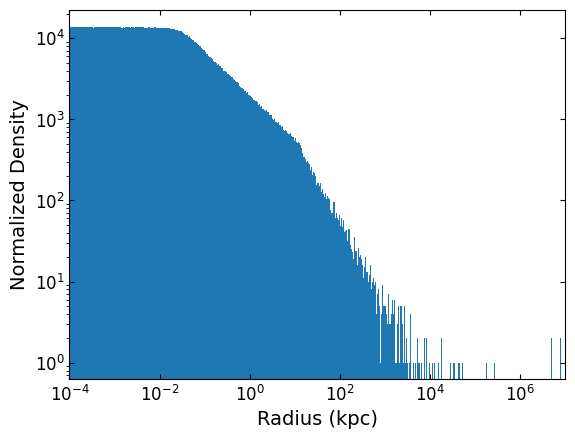

In [ ]:
np.load('/content/drive/MyDrive/rad_low_kpc.npy')
hist, bins, patches = plt.hist(rad_high_kpc, bins=bins_t)#, density=True)#, log=True)

plt.rcParams['font.size'] = 12  # Adjust font size as needed
plt.tick_params(direction='in', top=True, right=True)  # Ticks inside the plot
plt.xlabel('Radius (kpc)', fontsize=14)  # Increase label font size
plt.ylabel('Normalized Density', fontsize=14)  # Increase label font size
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-4, 1e7)
# plt.ylim(1e-12,1e8)

plt.savefig('mb_plot_wide_unorm.pdf', bbox_inches='tight')  # Save as PDF for high quality


# Remove spines (optional)
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)

# Add gridlines (optional)
# plt.grid(True, linestyle='--', alpha=0.5)

# Save the figure

# Show the plot
plt.show()

KeyboardInterrupt: 

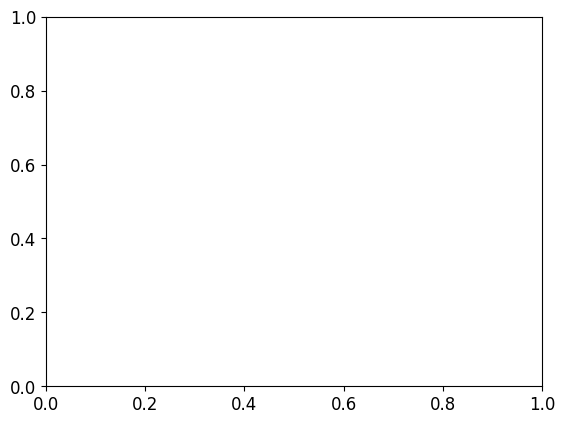

In [ ]:
import seaborn as sns
sns.kdeplot(rad_high_kpc, label='High KPC')
sns.kdeplot(rad_low_kpc, label='Low KPC')
plt.xlabel('Radius (kpc)')
plt.ylabel('Density')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

In [ ]:
hist, bins, patches = plt.hist(rad_low_kpc, bins=bins_t, density=True)#, log=True)

plt.rcParams['font.size'] = 12  # Adjust font size as needed
plt.tick_params(direction='in', top=True, right=True)  # Ticks inside the plot
plt.xlabel('Radius (kpc)', fontsize=14)  # Increase label font size
plt.ylabel('Normalized Density', fontsize=14)  # Increase label font size
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-4, 1e4)

plt.savefig('mb_time_plot.pdf', bbox_inches='tight')  # Save as PDF for high quality


NameError: name 'rad_low_kpc' is not defined

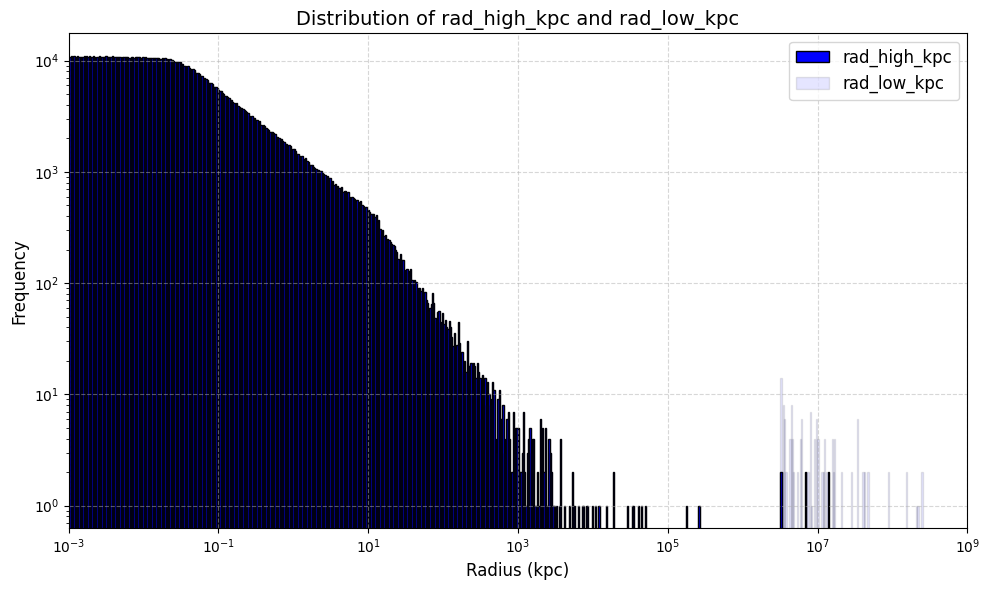

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load data (assuming files are in Google Drive)
rad_high_kpc = np.load('/content/drive/MyDrive/rad_high_kpc.npy')
rad_low_kpc = np.load('/content/drive/MyDrive/rad_low_kpc.npy')
rad_kpc = np.load('/content/drive/MyDrive/rad_kpc.npy')


plt.figure(figsize=(10, 6))

# Plot histograms with improved styling
plt.hist(rad_high_kpc, bins=bins_t, log=True, alpha=1.0, color='blue', edgecolor='black', label='rad_high_kpc')
plt.hist(rad_low_kpc, bins=bins_t, log=True, alpha=0.1, color='blue', edgecolor='black', label='rad_low_kpc')

# Customize plot elements
plt.xlabel('Radius (kpc)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of rad_high_kpc and rad_low_kpc', fontsize=14)
plt.legend(fontsize=12)
plt.xscale('log')
plt.yscale('log')
plt.grid(True, linestyle='--', alpha=0.5)  # Add a subtle grid
plt.xlim(1e-3, 1e9)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

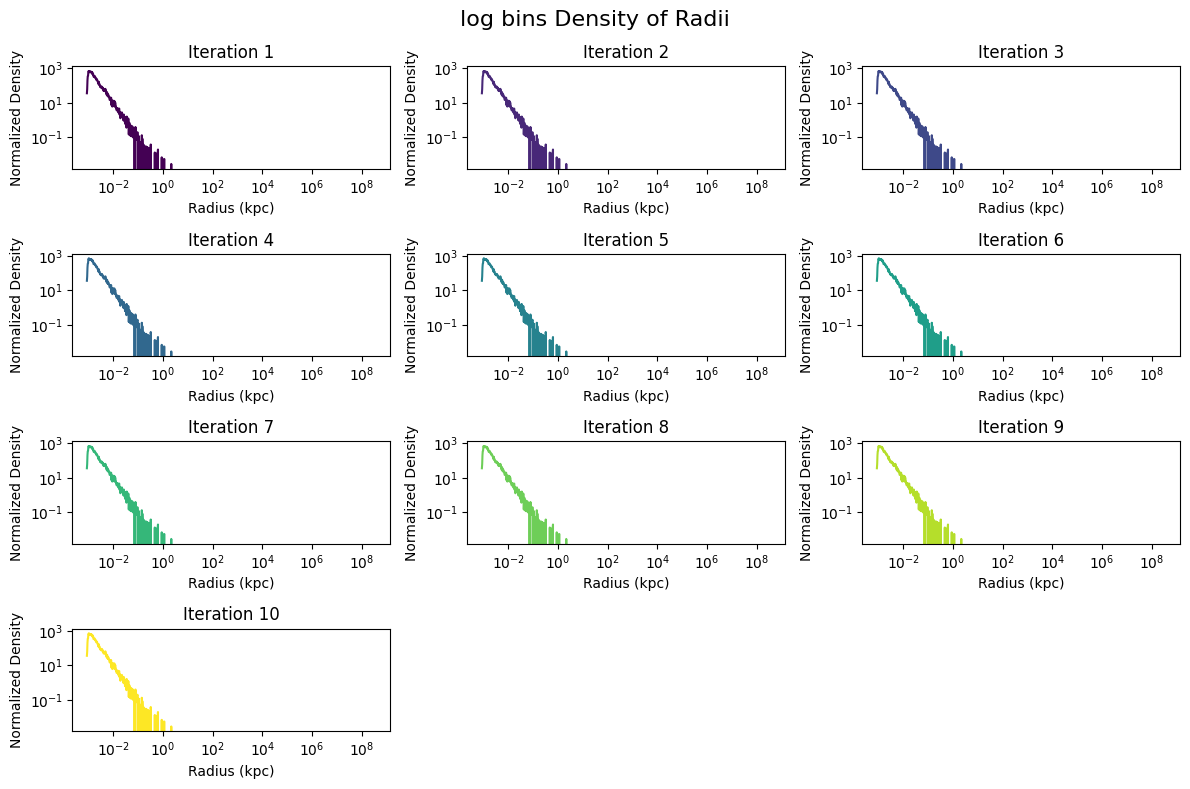

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Number of rows and columns for subplots
num_rows = int(np.ceil(np.sqrt(len(array_list))))
num_cols = int(np.ceil(len(array_list) / num_rows))

# Set up a colormap
colors = cm.viridis(np.linspace(0, 1, len(array_list)))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))  # Create subplots

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(array_list):
        hist_t, bins, _ = array_list[i]
        ax.plot(bins[:-1], hist_t, label=f'Iteration {i + 1}', color=colors[i])
        ax.set_xlabel('Radius (kpc)')
        ax.set_ylabel('Normalized Density')
        ax.set_title(f'Iteration {i + 1}')
        ax.set_xscale('log')
        ax.set_yscale('log')
    else:
        ax.axis('off')  # Turn off extra axes

fig.suptitle('log bins Density of Radii', fontsize=16)  # Main title
plt.tight_layout()  # Adjust subplot spacing
plt.show()

#Reaction rate with variable density

In [ ]:

#Time evolution of initial system
for t in range(totaltime):
  t += 1

  #rate of interaction
  normalization_factor = 0.1  # Gyr^-1
  rho_dm_norm = 0.1  # M_sun/pc^3
  # v_rel_norm = 50.0  # km/s
  sigma_per_m_norm = 1.0  # cm^2/g

  #Adjustable constants
  nuc_density = 0.001  # M_sun/pc^3
  rho_dm = density = hist * 1e10 * 1e9* 2.38/(c**2) / (1e30*(4 * np.pi * (bin_centers * 1e-3)**3))
  # M_sun/pc^3
  # v_rel = 50.0  # km/s
  sigma_per_m = 1e-4  # cm^2/g

  # Calculate the scattering rate
  rate = normalization_factor   * (sigma_per_m / sigma_per_m_norm) * (rho_dm / rho_dm_norm)#(v_rel / v_rel_norm)

  sample = size * size * rate

  #choosing new radii of interactiojn based on
  sample_radius = np.asarray(random.choices(bins[:-1], weights=hist, k=sample))

  for value in sample_radius:

    r_earth = value  #Radius of Sagitarrius B in m
    # r_earth =  30856778570831268 * value  #Radius of Sagitarrius B in m from kpc
    # Compute new orbit for particle m
    # print(r_earth)
    delta_v_m  = np.random.normal(mu, sigma)


    r_new, a_new, delta_r, E_new = new_orbit_circular(r_earth, delta_v_m)
    r_new = abs(r_new)
    r_kpc_new = r_new

    if not np.isnan(r_new) and E_new < 0: #and (1e-7 <= r_new/kpc <= 1e7):
      # rad_kpc.append(np.log((np.sqrt(r_new**2)/30856778570831268)))
      # radius_dist.append(np.log(np.sqrt((r_new**2))))
      rad_kpc.append(np.sqrt(r_new**2)/kpc)
      radius_dist.append(np.sqrt(r_new**2))

    # Compute new orbit for particle n
    delta_v_n  = -1*np.random.normal(mu, sigma)

    # theta = 0.0
    #for theta in np.linspace(0, np.pi/2, 1000):
      #delta_v = np.cos(theta) * delta_v
    #   delta_v = 0.12*c
    r_new, a_new, delta_r, delta_E = new_orbit_circular(r_earth, delta_v_n)
    r_new = abs(r_new)
    r_kpc_new = r_new
    # print(r_new)
    # print(r_kpc_new)
    # print(delta_v)
    #r_new = np.sqrt(r_new**2)
    if not np.isnan(r_new) and E_new < 0: #and (1e-7 <= r_new/kpc <= 1e7):
      # rad_kpc.append(np.log((np.sqrt(r_new**2)/30856778570831268)))
      # radius_dist.append(np.log(np.sqrt((r_new**2))))
      rad_kpc.append(np.sqrt(r_new**2)/kpc)
      radius_dist.append(np.sqrt(r_new**2))

bins = logarithmic_bins(rad_kpc, num_bins=1000)
hist, bins, patches = plt.hist(rad_kpc, bins=bins, density=True, log=True)
plt.xlabel('Radius (kpc)')
plt.ylabel('Normalized Density t=1')
plt.title('log bins Density of Radii')
plt.xscale('log')
plt.yscale('log')
# plt.xlim(1e-4, 1e4)
# # plt.xlim(0.0005e5, 0.0015*1.6e5)
# plt.ylim(0, 20000)
plt.show()



Density with units

In [ ]:
from scipy.constants import c

In [ ]:
bins = logarithmic_bins(rad_kpc, num_bins=1000)
# hist, bins, patches = plt.hist(rad_kpc, bins=bins, density=True, log=True)
#Calculate the bin centers
bin_centers = (bins[:-1] + bins[1:]) / 2
# Calculate the density for each bin
density = hist * 1e10 * 2.38/(c**2) / (1e30*(4 * np.pi * (bin_centers * 1e-3)**3))
plt.xlabel('Radius (kpc)')
plt.ylabel('Normalized Density (M☉/Mpc³)')
plt.title('Dark Matter Density Distribution as a function of Radius')
plt.xscale('log')
plt.yscale('log')
# plt.xlim(1e-4, 1e4)
# # plt.xlim(0.0005e5, 0.0015*1.6e5)
# plt.ylim(0, 20000)
plt.plot(bin_centers, density) # Plot the density against bin centers
# plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.hist(rad_kpc, bins='auto', log=True, edgecolor='black', alpha=0.7)  # Log binning
plt.xlabel('Radius (kpc)')
plt.ylabel('Normalized Density')
plt.title('Normalized Distribution Density of Radii')
plt.xscale('log')
plt.yscale('log')
# plt.xlim(1e-4, 1e4)
# # plt.xlim(0.0005e5, 0.0015*1.6e5)
# plt.ylim(0, 20000)
plt.show()

In [ ]:
import numpy as np

# Assuming 'rad_pc' is your data array
print("Minimum value:", np.min(rad_pc))
print("Maximum value:", np.max(rad_pc))
print("Mean value:", np.mean(rad_pc))

In [ ]:
plt.hist(rad_pc, bins='auto', edgecolor='black', alpha=0.7)  # Log binning
plt.xlabel('Radius (pc)')
plt.ylabel('Normalized Density')
plt.title('Normalized Distribution Density of Radii')
plt.xscale('log')
plt.yscale('log')
# plt.xlim(1e-4, 1e4)
# # plt.xlim(0.0005e5, 0.0015*1.6e5)
# plt.ylim(0, 20000)
plt.show()